Demo napari visualization modes in image layer.

napari version 0.4.13

## Create demo images

Generate 3D spheres to demo napari rendering:

- uni_ball: 3D sphere with unified intensity
- grad_ball: 3D sphere with gradient intensity, with highest intensity at the center
- u_ball/l_ball: grad_ball shifted to upper/lower positions 

In [76]:
from skimage.morphology import ball
import numpy as np

int_scale = 200
radius = 51

uni_ball = ball(radius)*int_scale

grad_ball = np.zeros(uni_ball.shape)
for i in range(1,radius,2):
    sub_ball = ball(i)
    pad_wdth = int((uni_ball.shape[0]-sub_ball.shape[0])/2)
    sub_ball = np.pad(sub_ball,pad_wdth,mode='constant')
    grad_ball += sub_ball

grad_ball = grad_ball*(int_scale/np.max(grad_ball))

ext = np.zeros((grad_ball.shape[0],int(grad_ball.shape[1]/2),grad_ball.shape[2]))
u_ball = np.concatenate((grad_ball,ext),axis=1)
l_ball = np.concatenate((ext,grad_ball),axis=1)

In [77]:
import napari
from napari.utils import nbscreenshot

## Interpolation
Selects a preset interpolation mode in vispy that determines how volume is displayed. Makes use of the two Texture2D interpolation methods and the available interpolation methods defined in vispy/glsl/misc/spatial-filters.frag 

See Vispy documentation:
https://www.ssec.wisc.edu/~davidh/tmp/vispy/api/vispy.glsl.build_spatial_filters.html

### nearest (2D/3D)
No filter (smoothing) is applied. Displays the intensity value of the nearest pixel.

### linear (3D only)
?? can't find it in API reference

### bilinear (2D only)
Applies intensity interpolation with filter radius = 1.0.

### bicubic (2D only)
Applies intensity interpolation with filter radius = 2.0. More aggresive smoothing compared to bilinear mode.

### kaiser (2D only)
?? when to use this mode
### spline36 (2D only)
?? when to use this mode

* Additional interpolation methods can be accessed from API: https://napari.org/api/stable/napari.layers.Image.html?highlight=interpolation#napari.layers.Image.interpolation
* code in napari/??

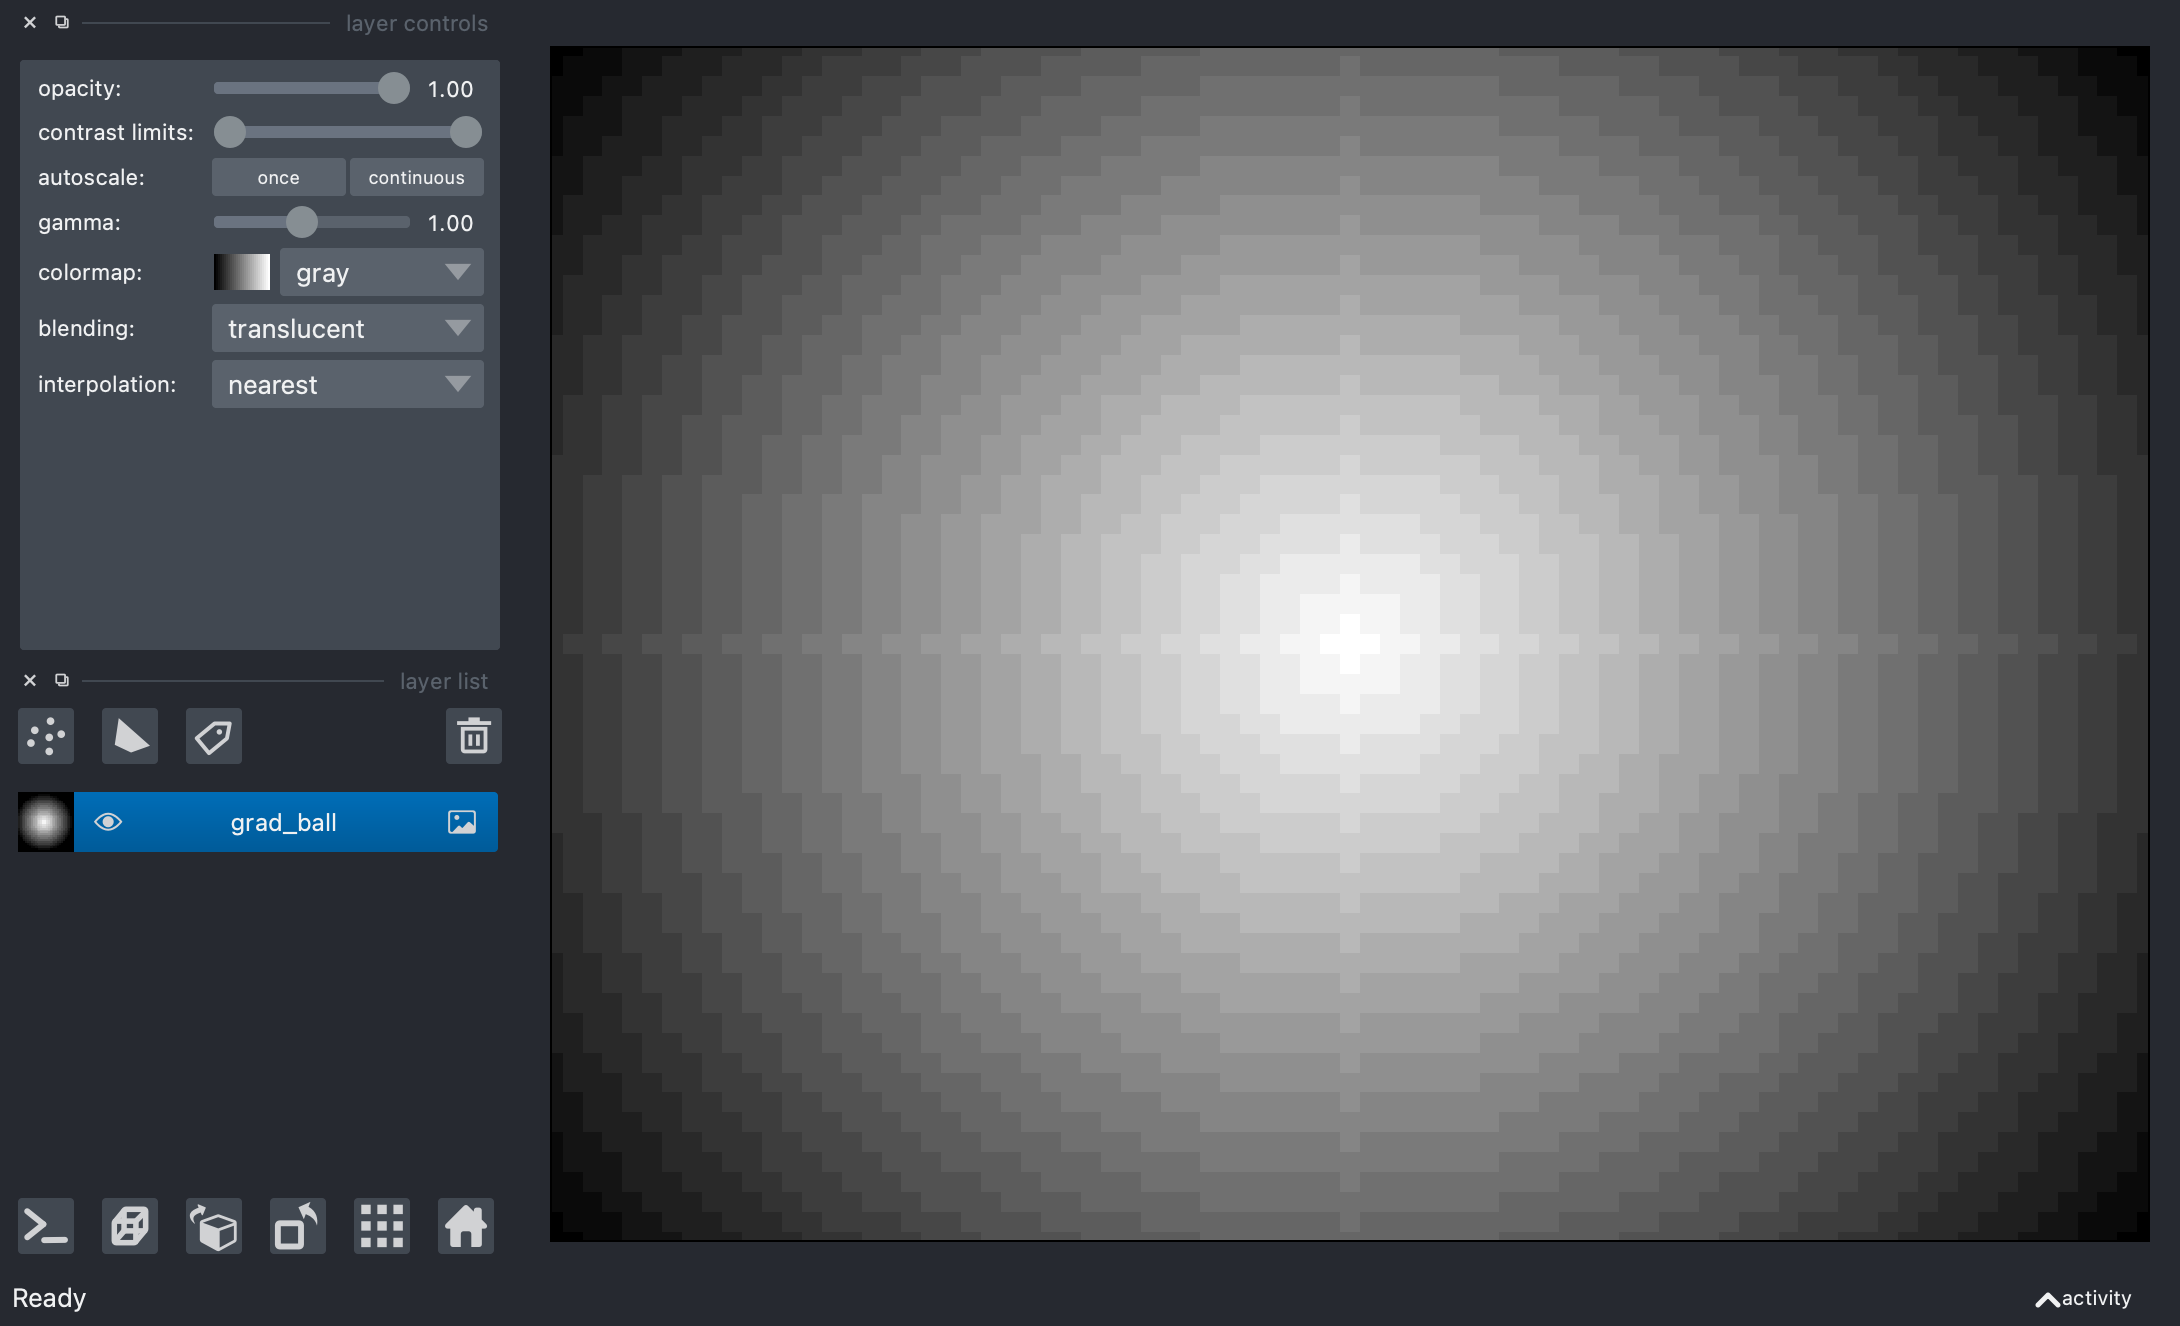

In [78]:
viewer = napari.Viewer()
grad = viewer.add_image(grad_ball[51,:,:], name='grad_ball', colormap='gray')
#how to set slider position?
viewer.camera.zoom = 10

grad.interpolation='nearest'
nbscreenshot(viewer)

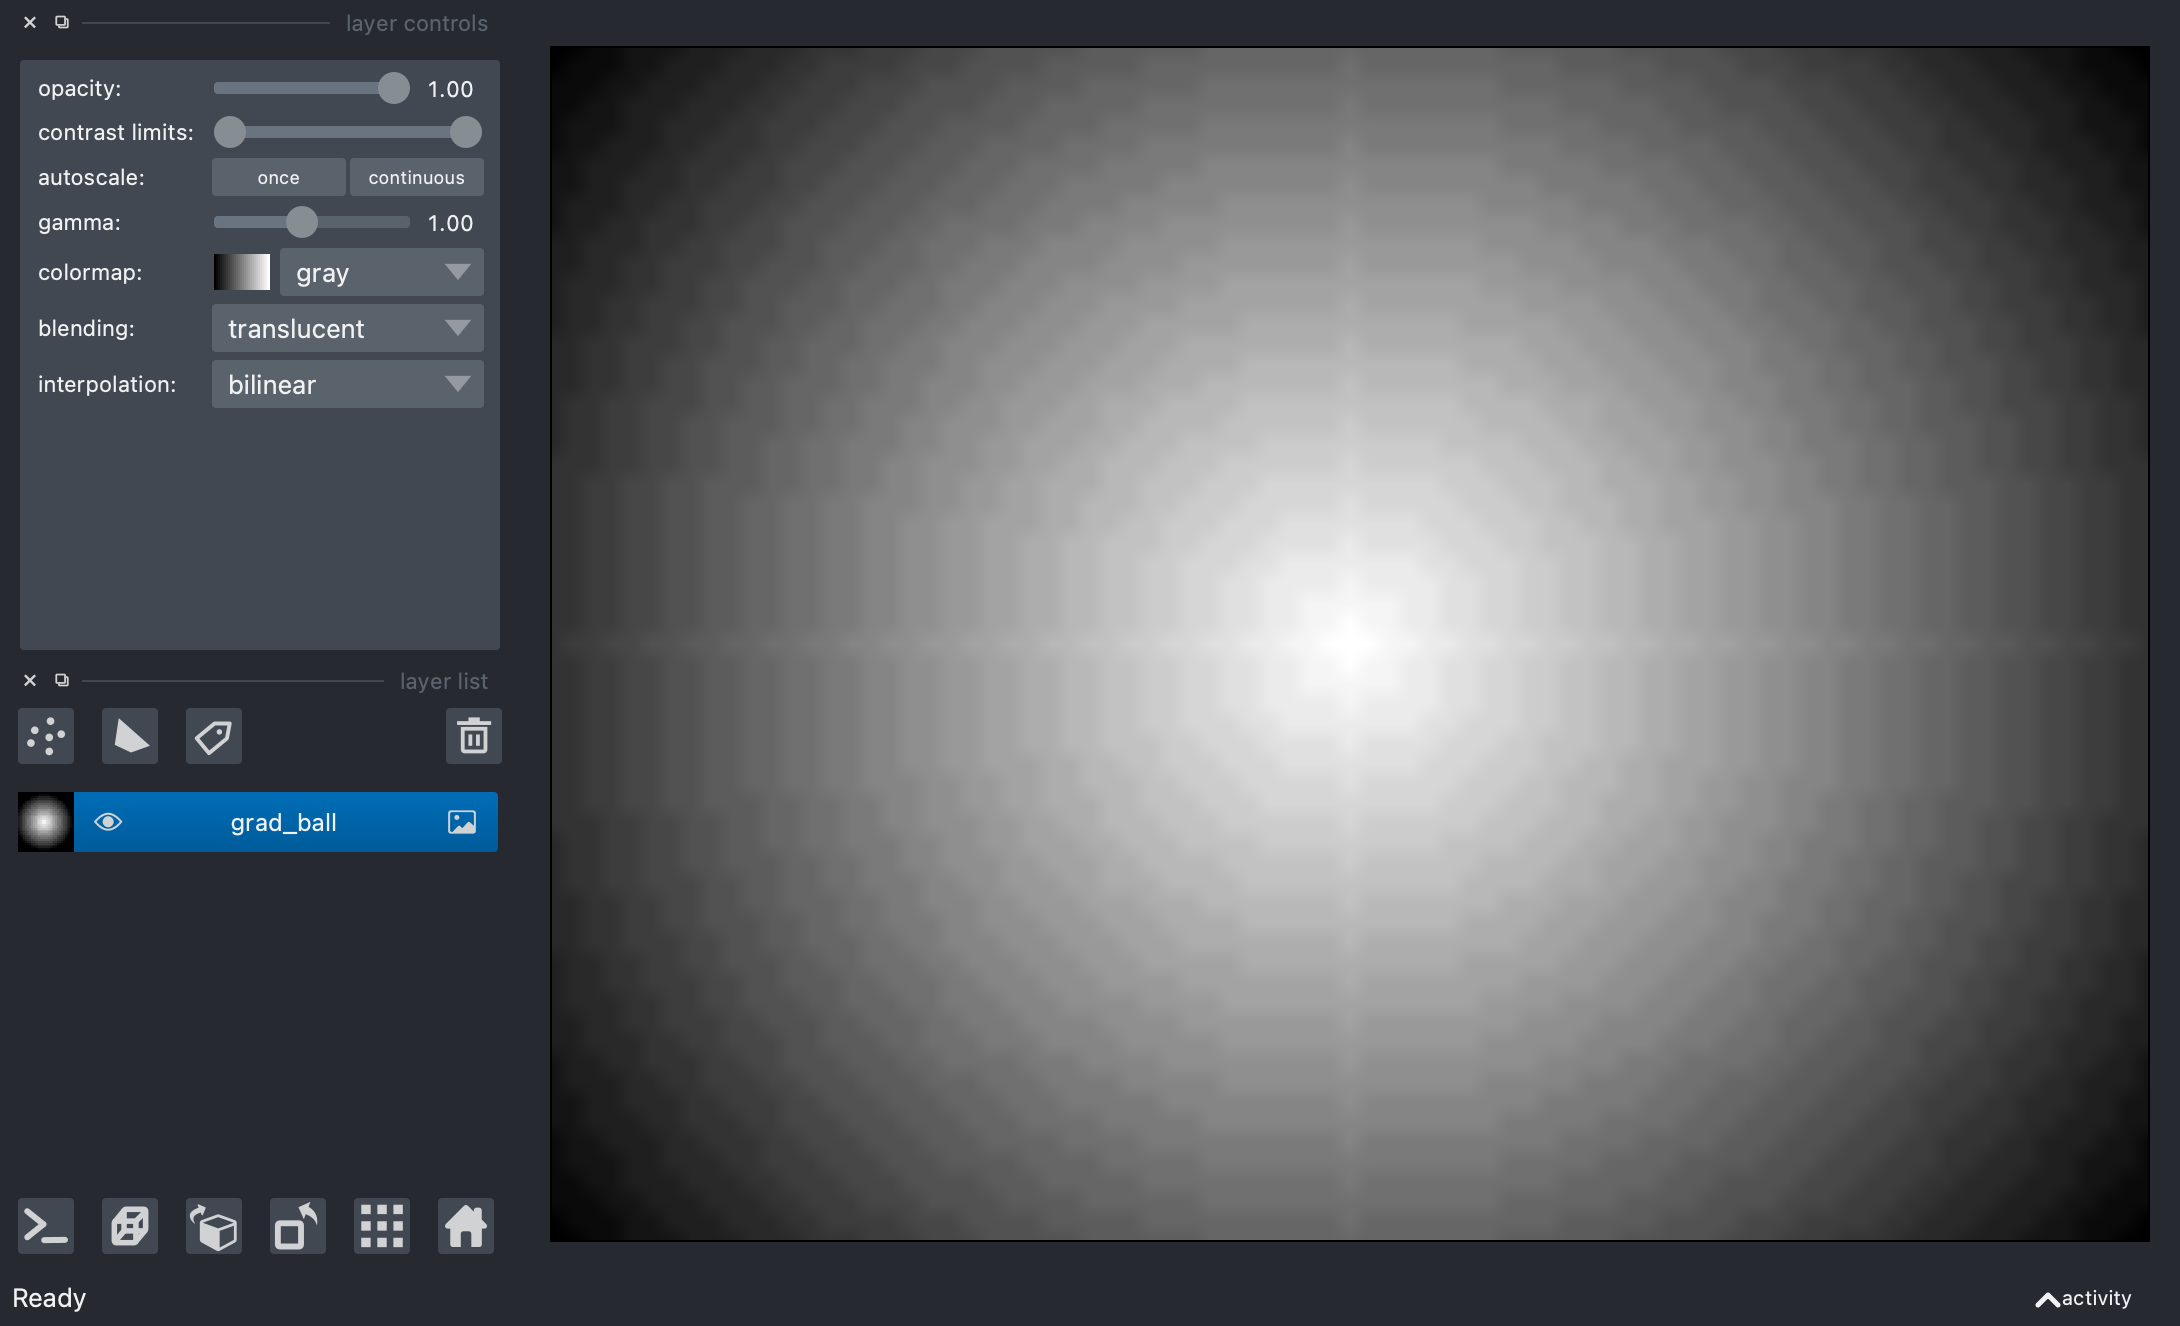

In [79]:
grad.interpolation = 'bilinear'
nbscreenshot(viewer)

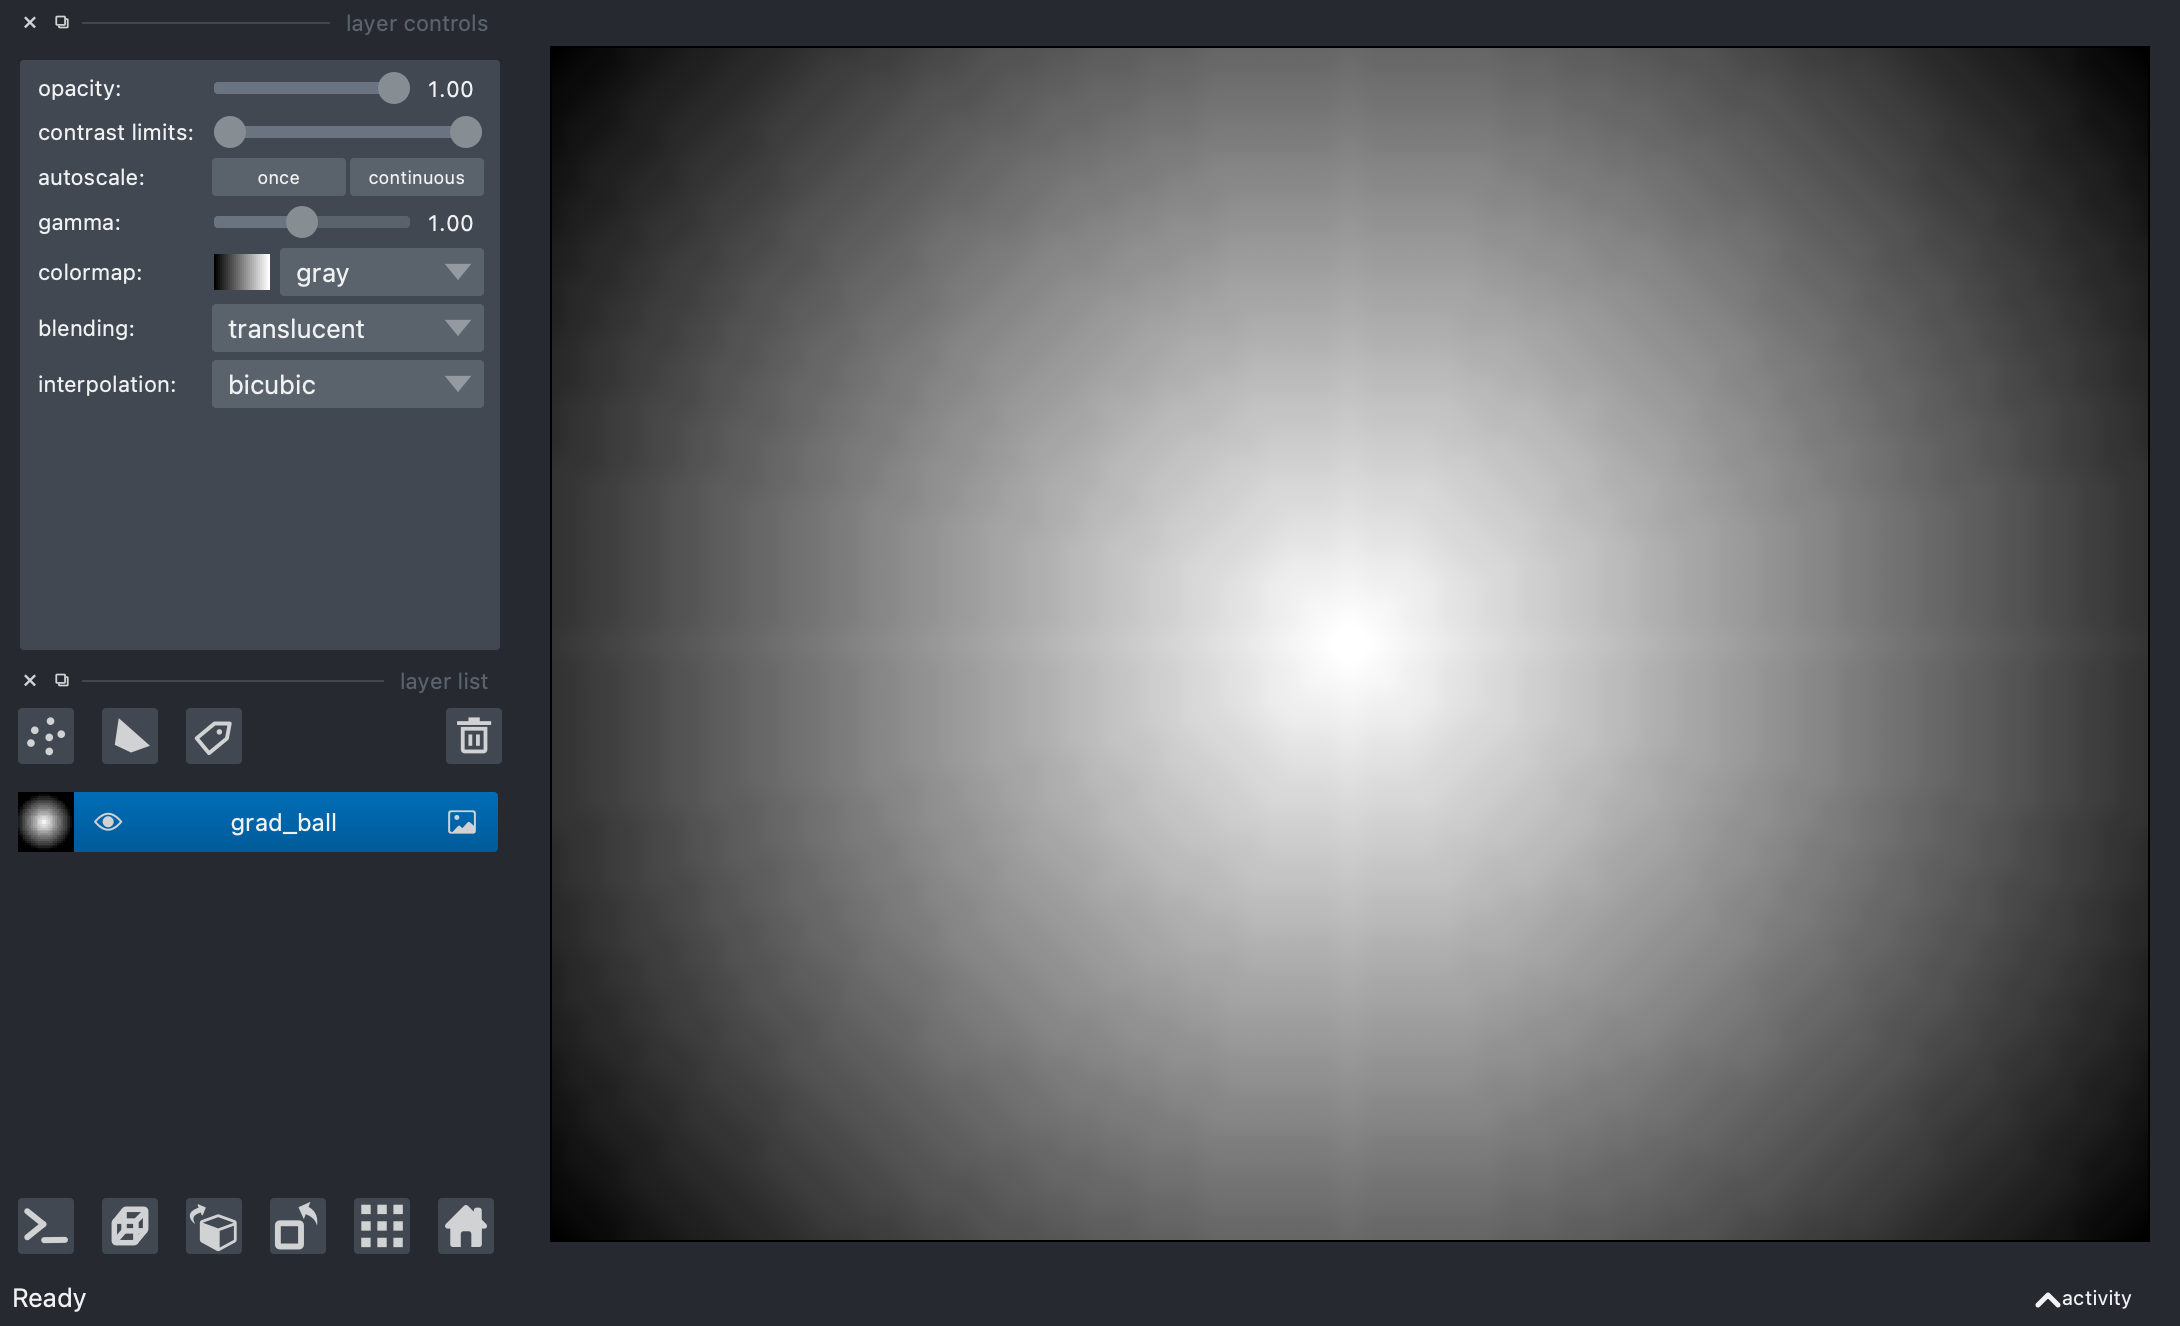

In [80]:
grad.interpolation = 'bicubic'
nbscreenshot(viewer)

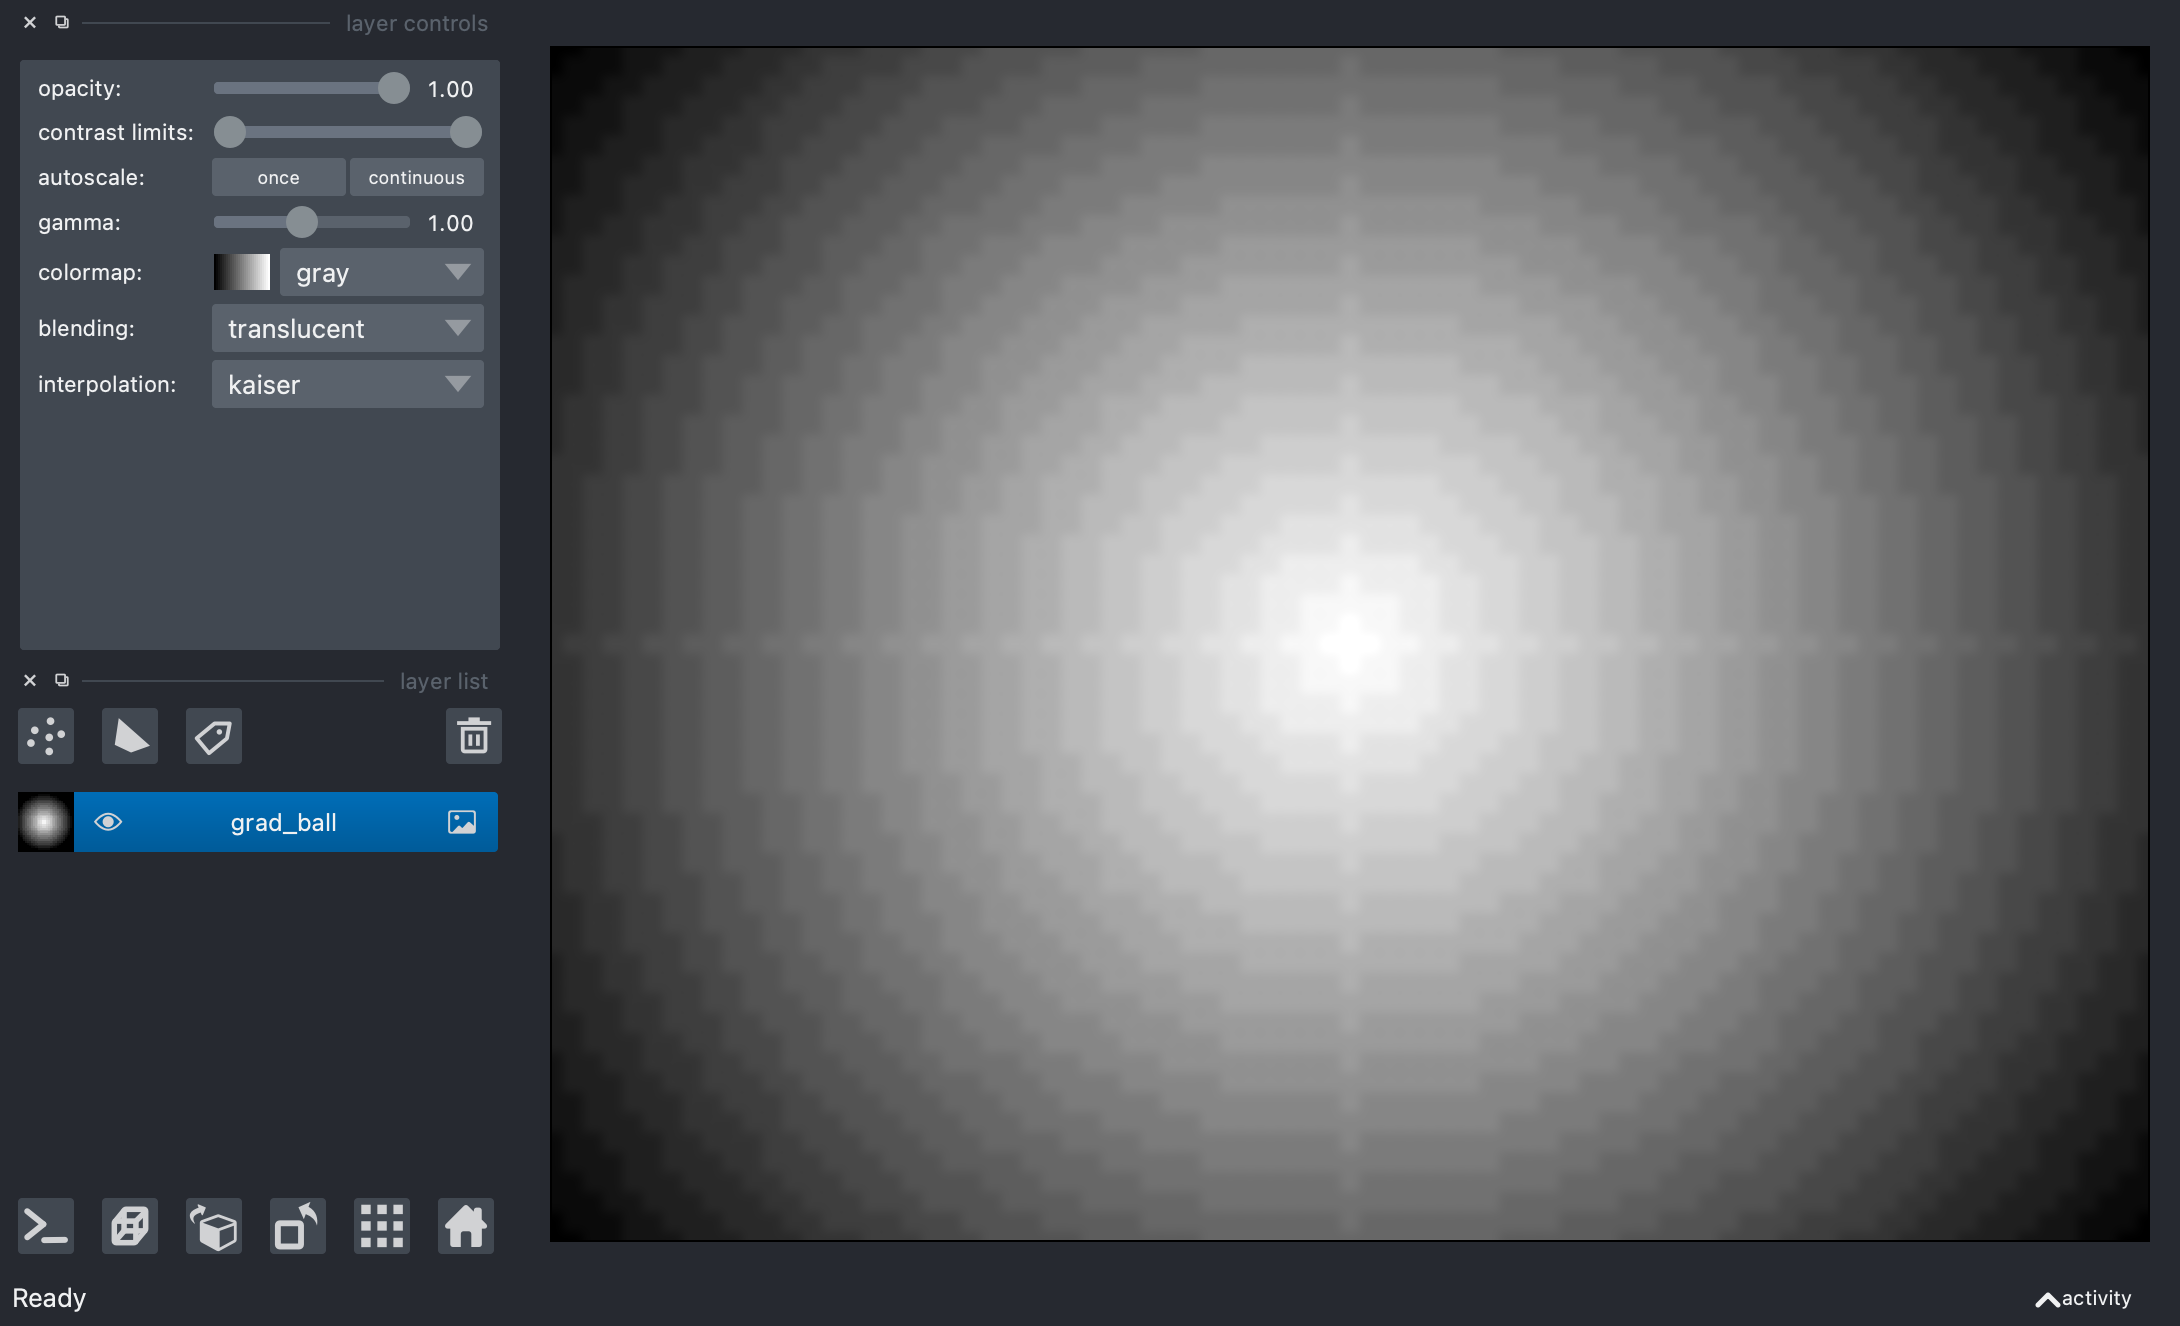

In [81]:
grad.interpolation = 'kaiser'
nbscreenshot(viewer)

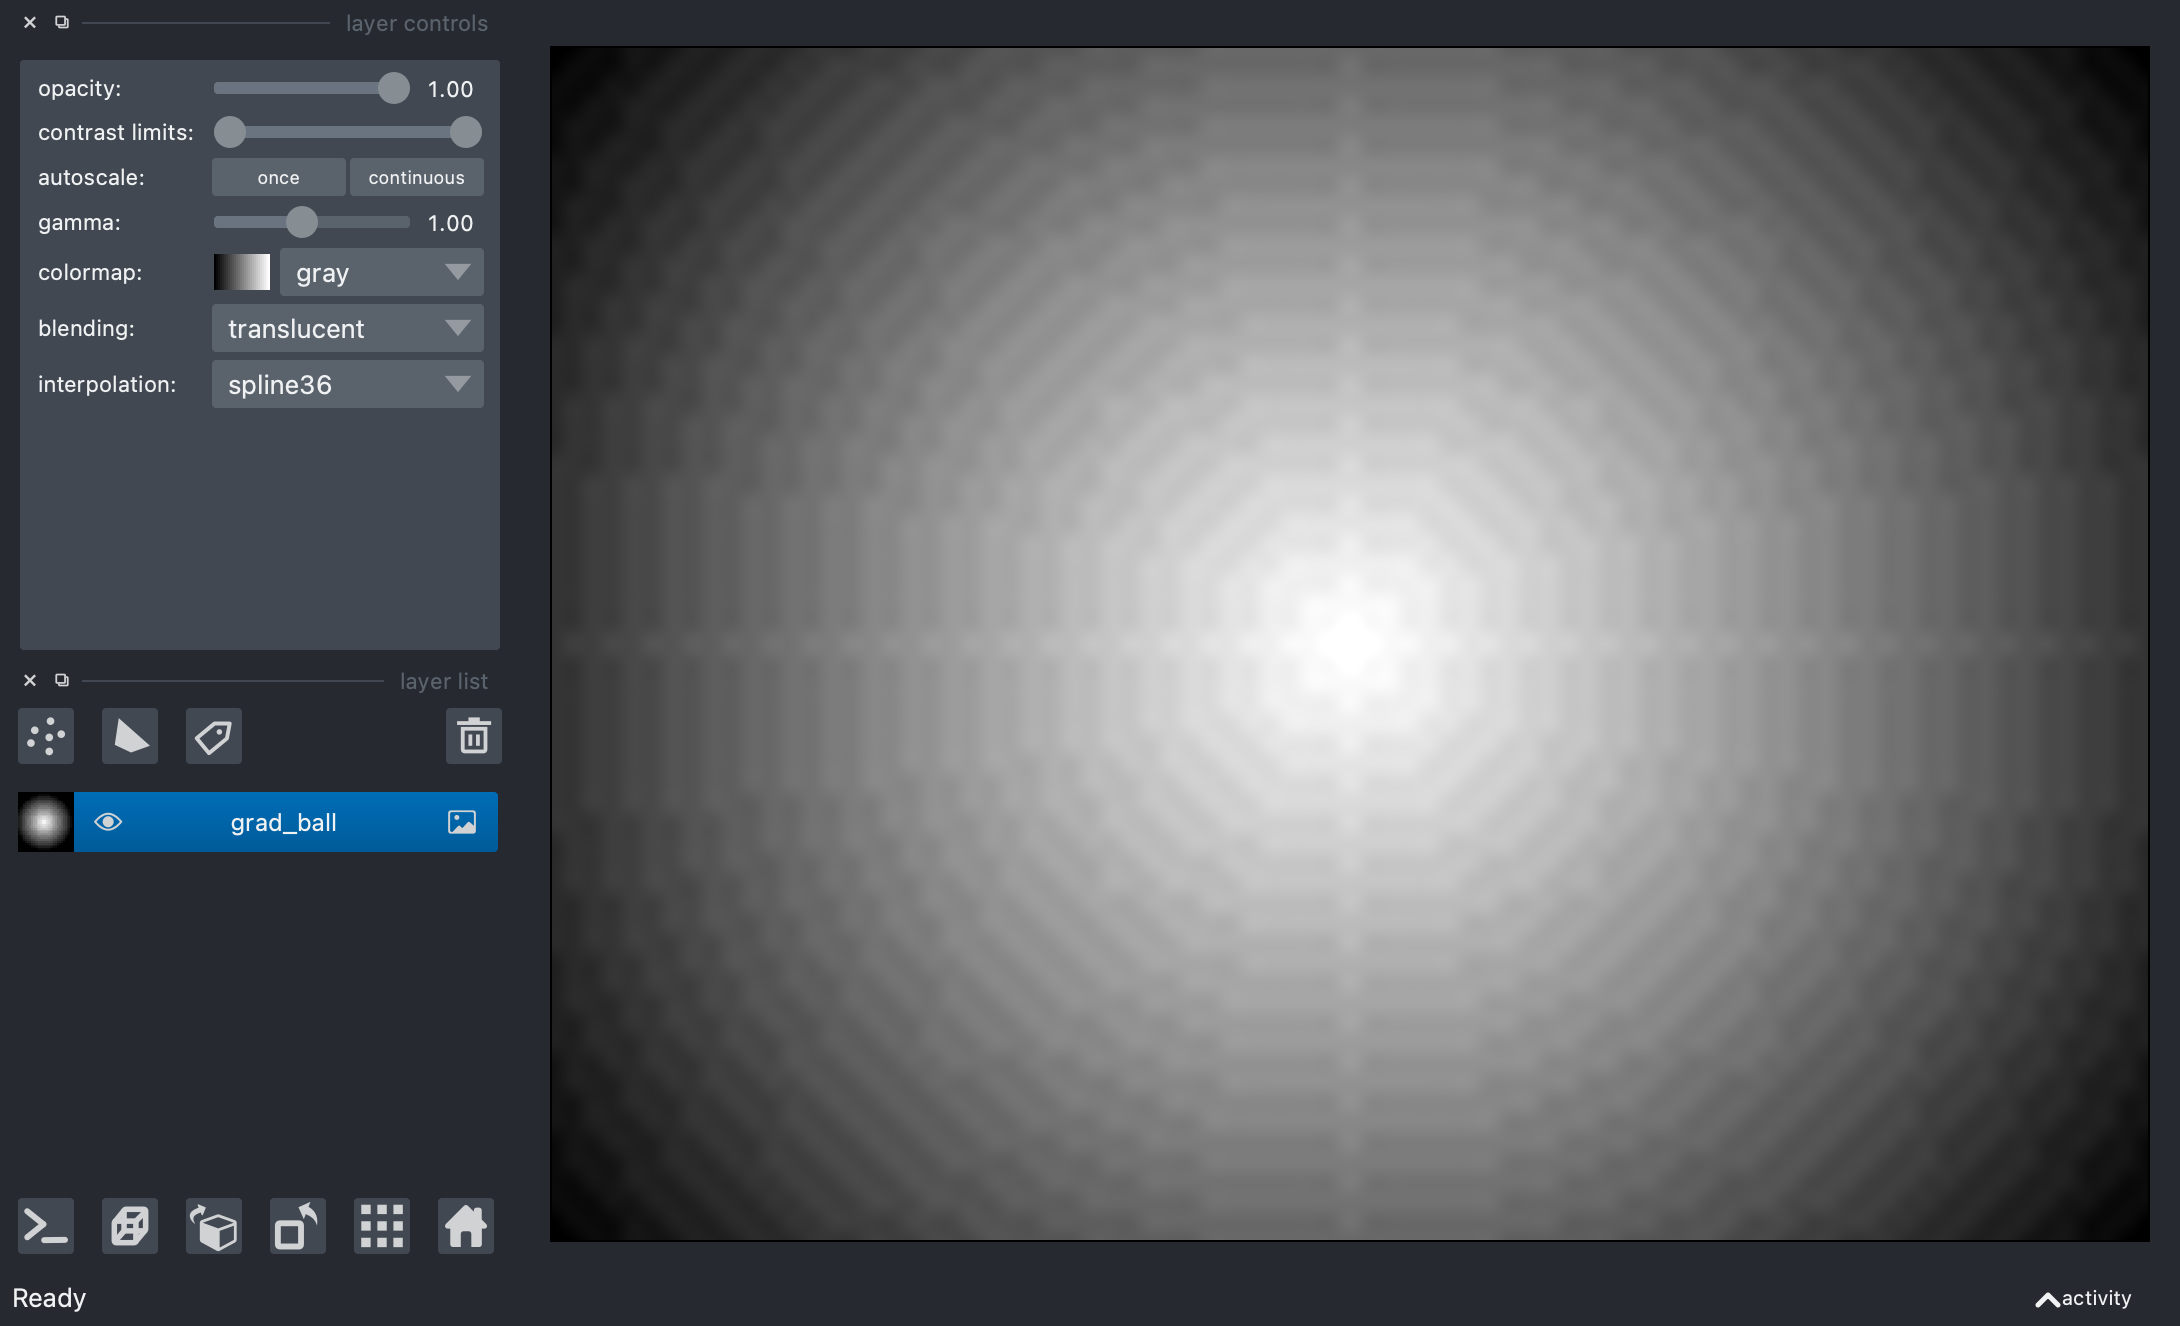

In [82]:
grad.interpolation = 'spline36'
nbscreenshot(viewer)

## Rendering
Affects 3D rendering

### translucent
Voxel colors are blended along the view ray until the result is opaque.

### additive
Voxel colors are added along the view ray until the result is saturated.

### iso
Isosurface. Cast a ray until a certain threshold is encountered. At that location, lightning calculations are performed to give the visual appearance of a surface.

### mip
Maximum intensity projection. Cast a ray and display the maximum value that was encountered.

### minip
Minimum intensity projection. Cast a ray and display the minimum value that was encountered.

### attenuated_mip
Attenuated maximum intensity projection. Cast a ray and attenuate values based on integral of encountered values, display the maximum value that was encountered after attenuation. This will make nearer objects appear more prominent.

### average
Average intensity projection. Cast a ray and display the average of values that were encountered.

* API reference: https://napari.org/api/stable/napari.layers.Image.html#napari.layers.Image.rendering
* code in napari/??

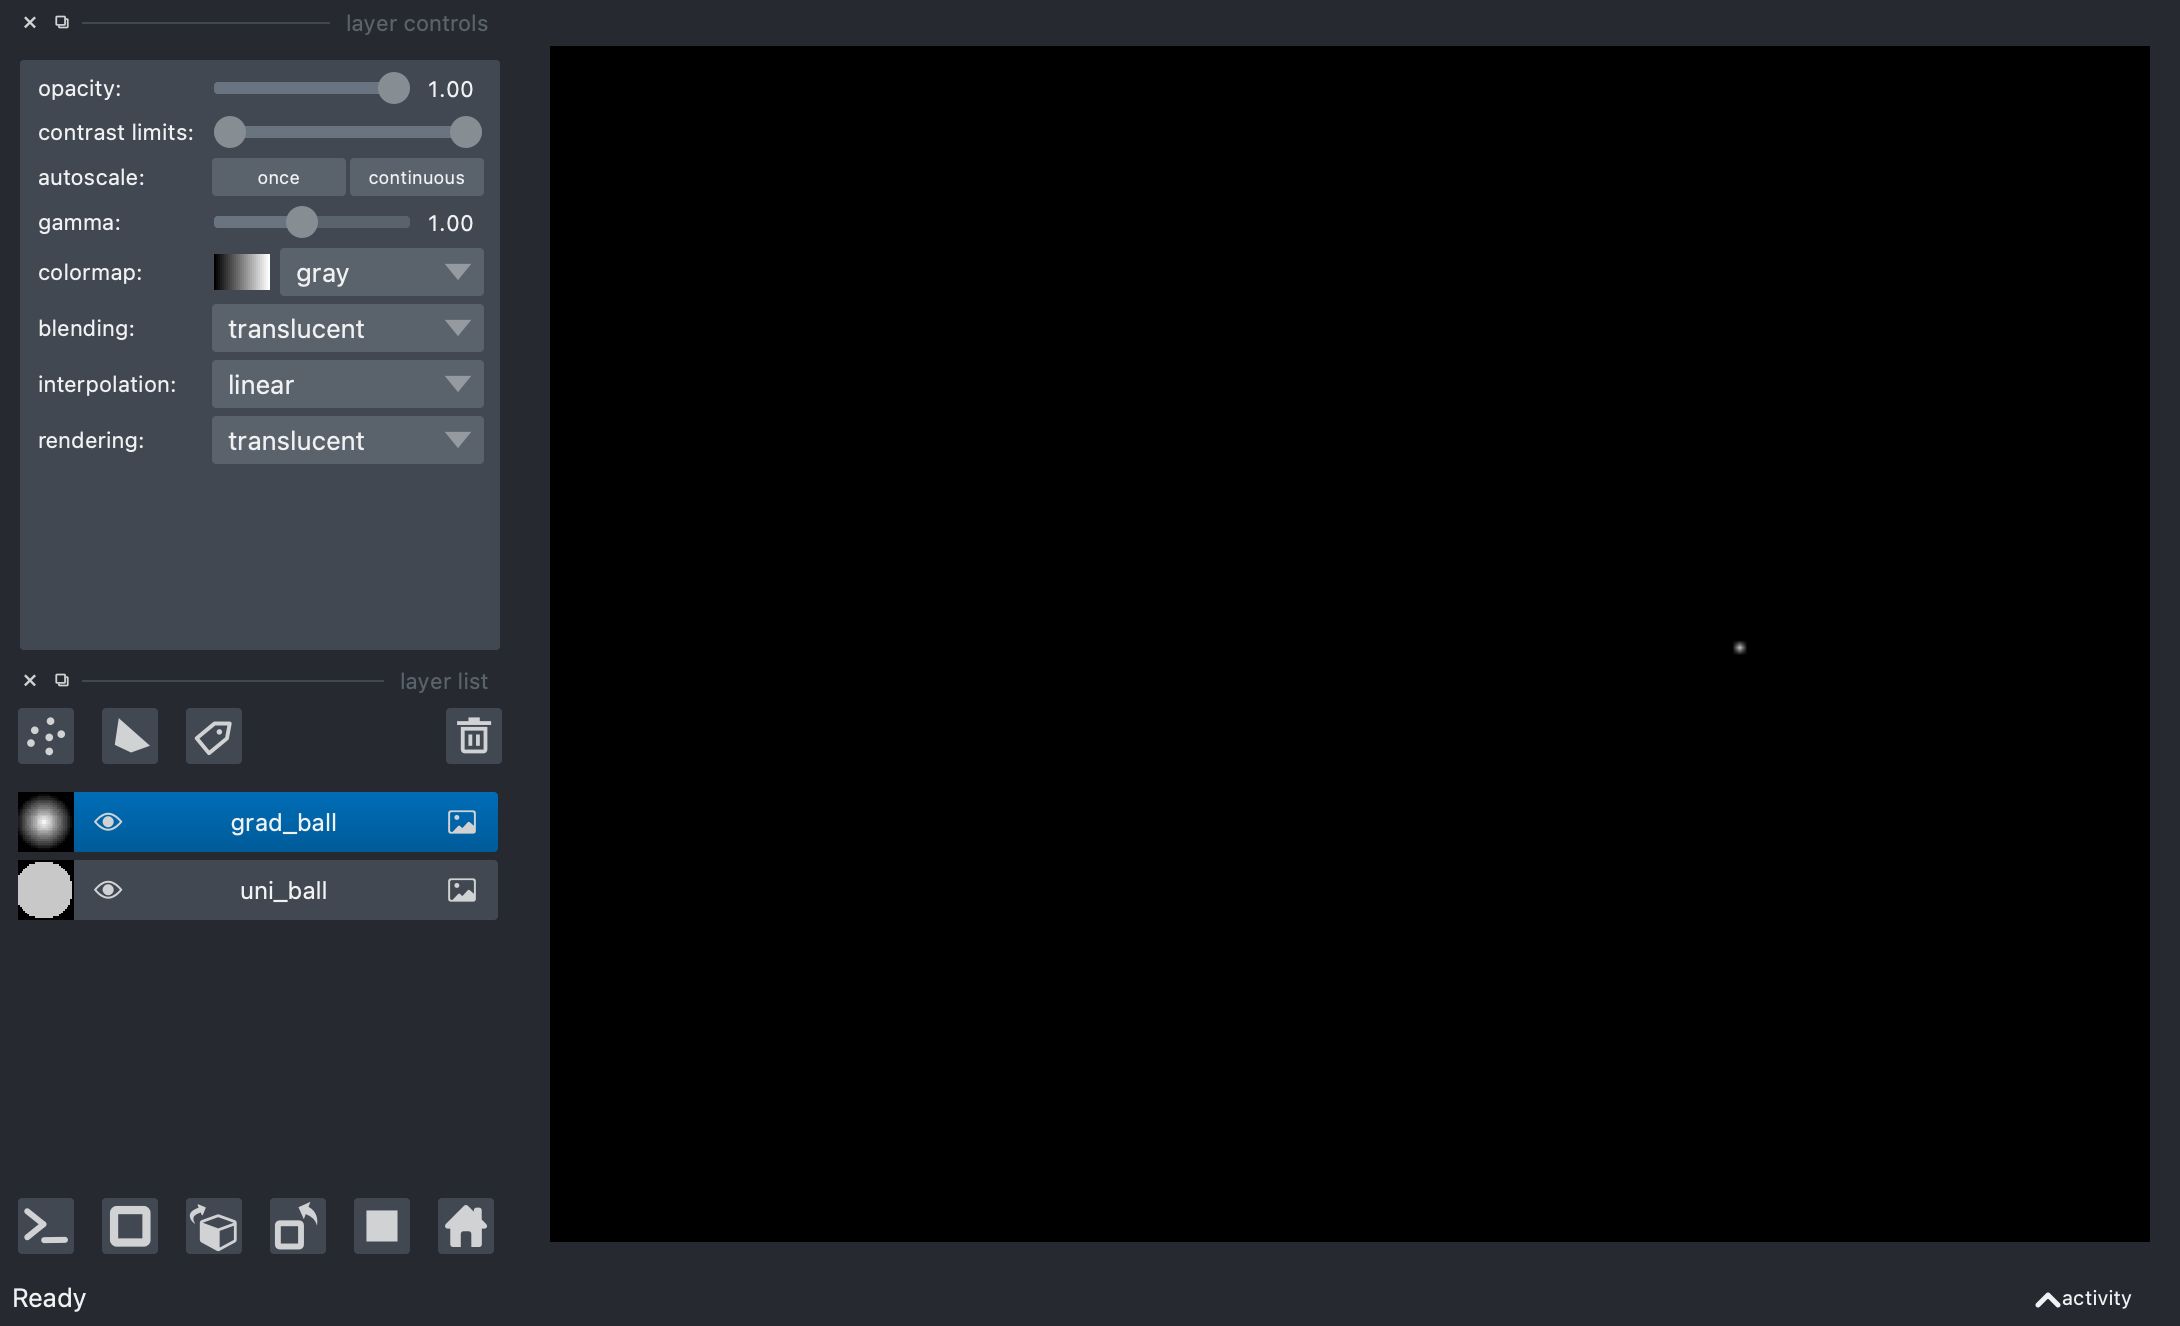

In [83]:
viewer = napari.Viewer(ndisplay=3)
uni = viewer.add_image(uni_ball, name='uni_ball', colormap='gray')
grad = viewer.add_image(grad_ball, name='grad_ball', colormap='gray')
viewer.grid.enabled = True
uni.rendering = 'translucent'
grad.rendering = 'translucent'
nbscreenshot(viewer)

#poor result because default opacity = 1

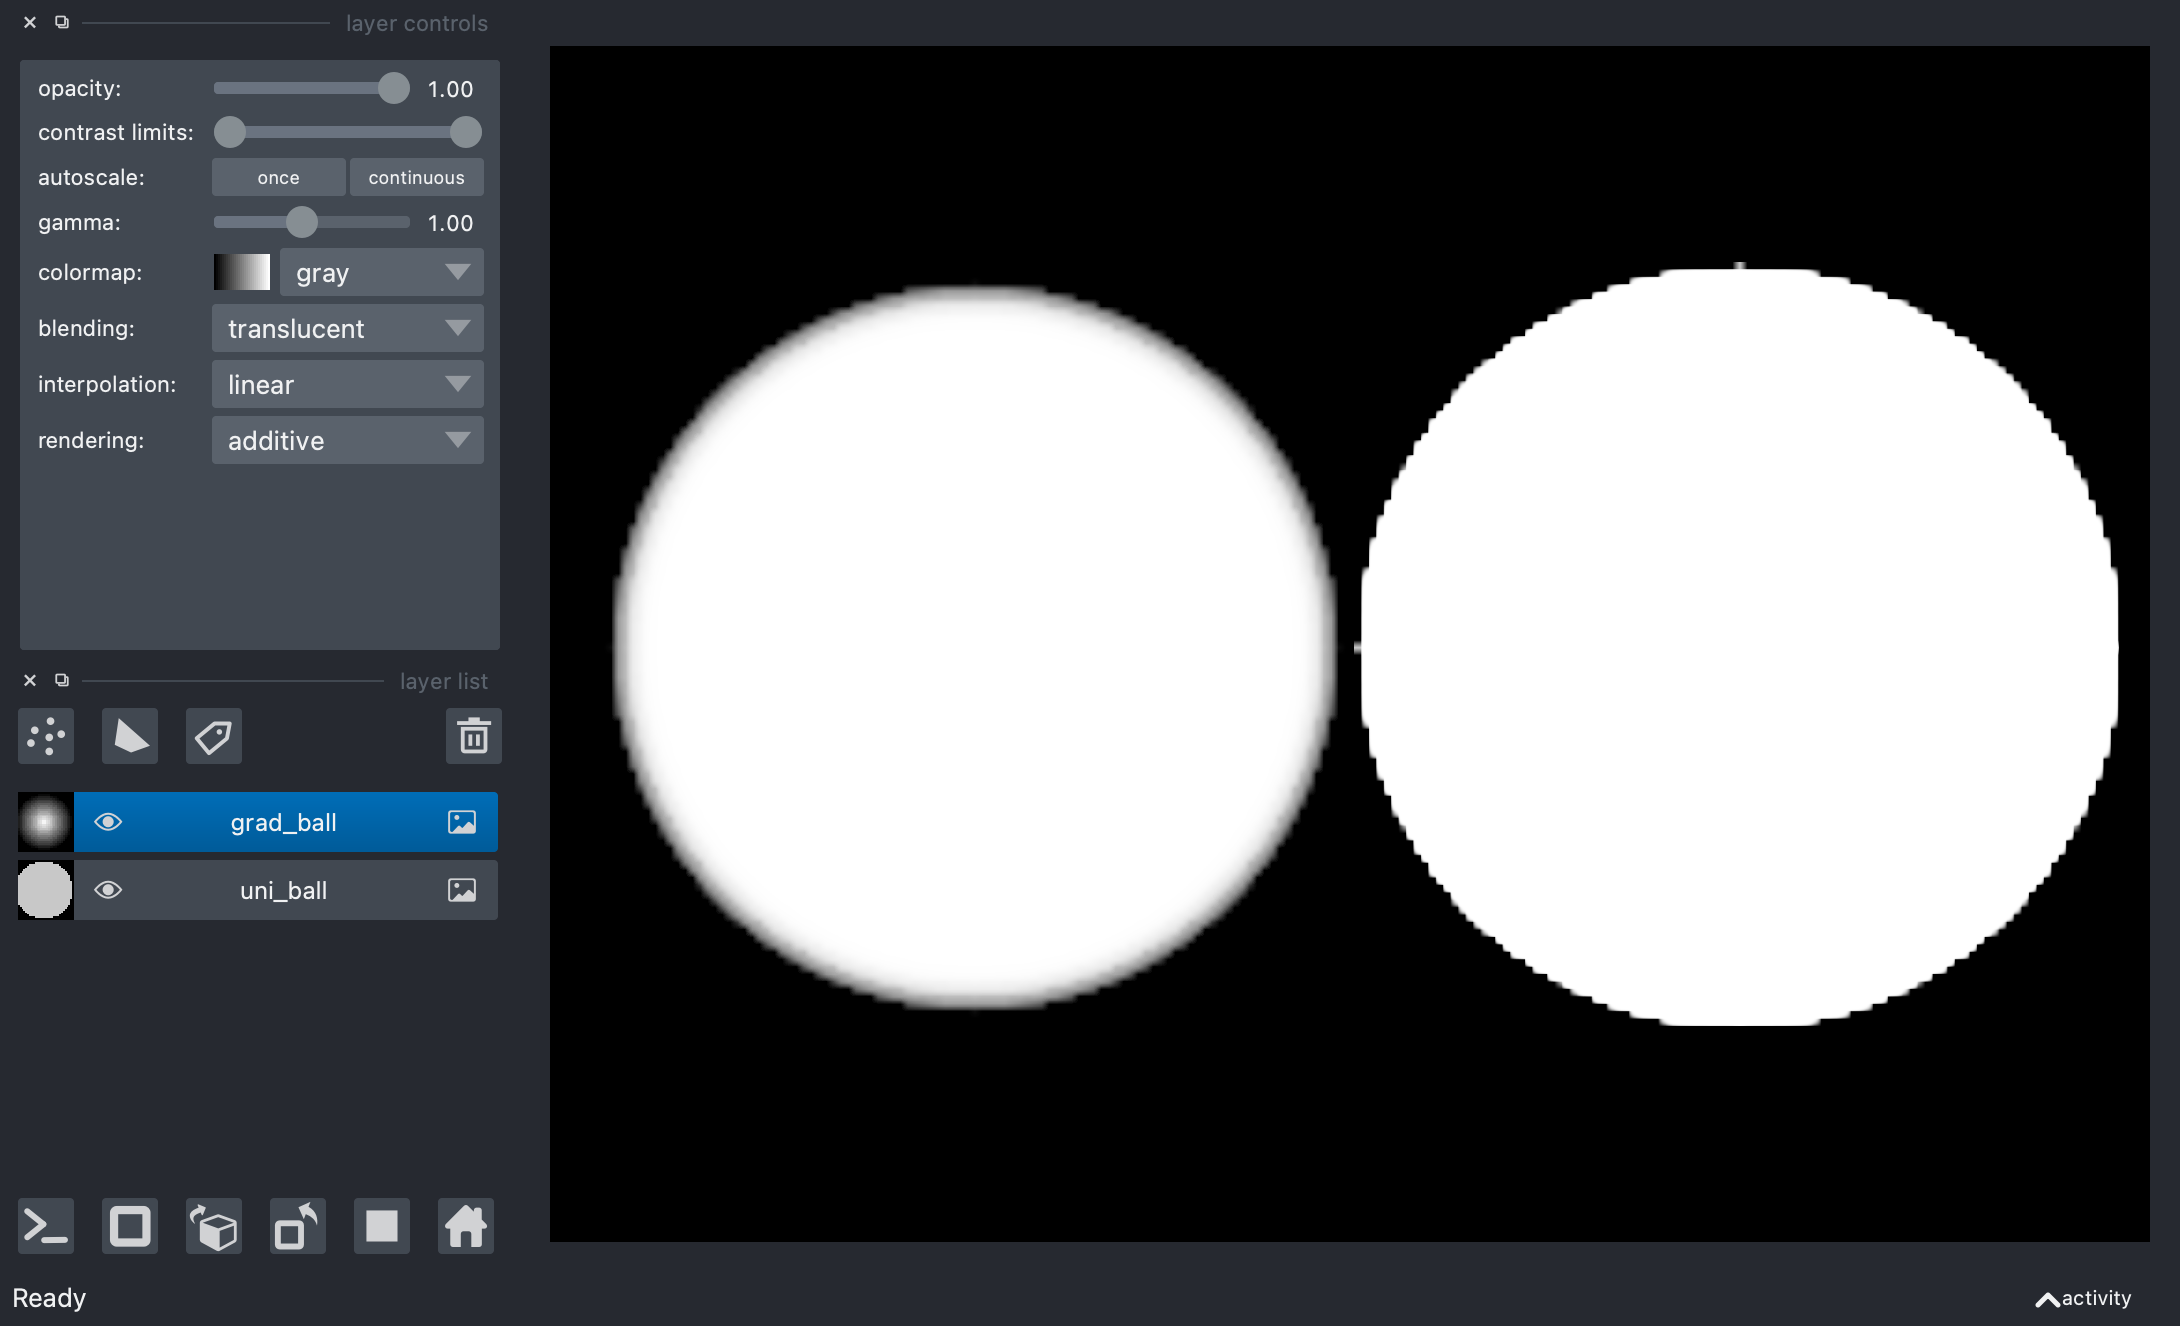

In [84]:
uni.rendering = 'additive'
grad.rendering = 'additive'
nbscreenshot(viewer)

# grad_ball is "saturated", why?

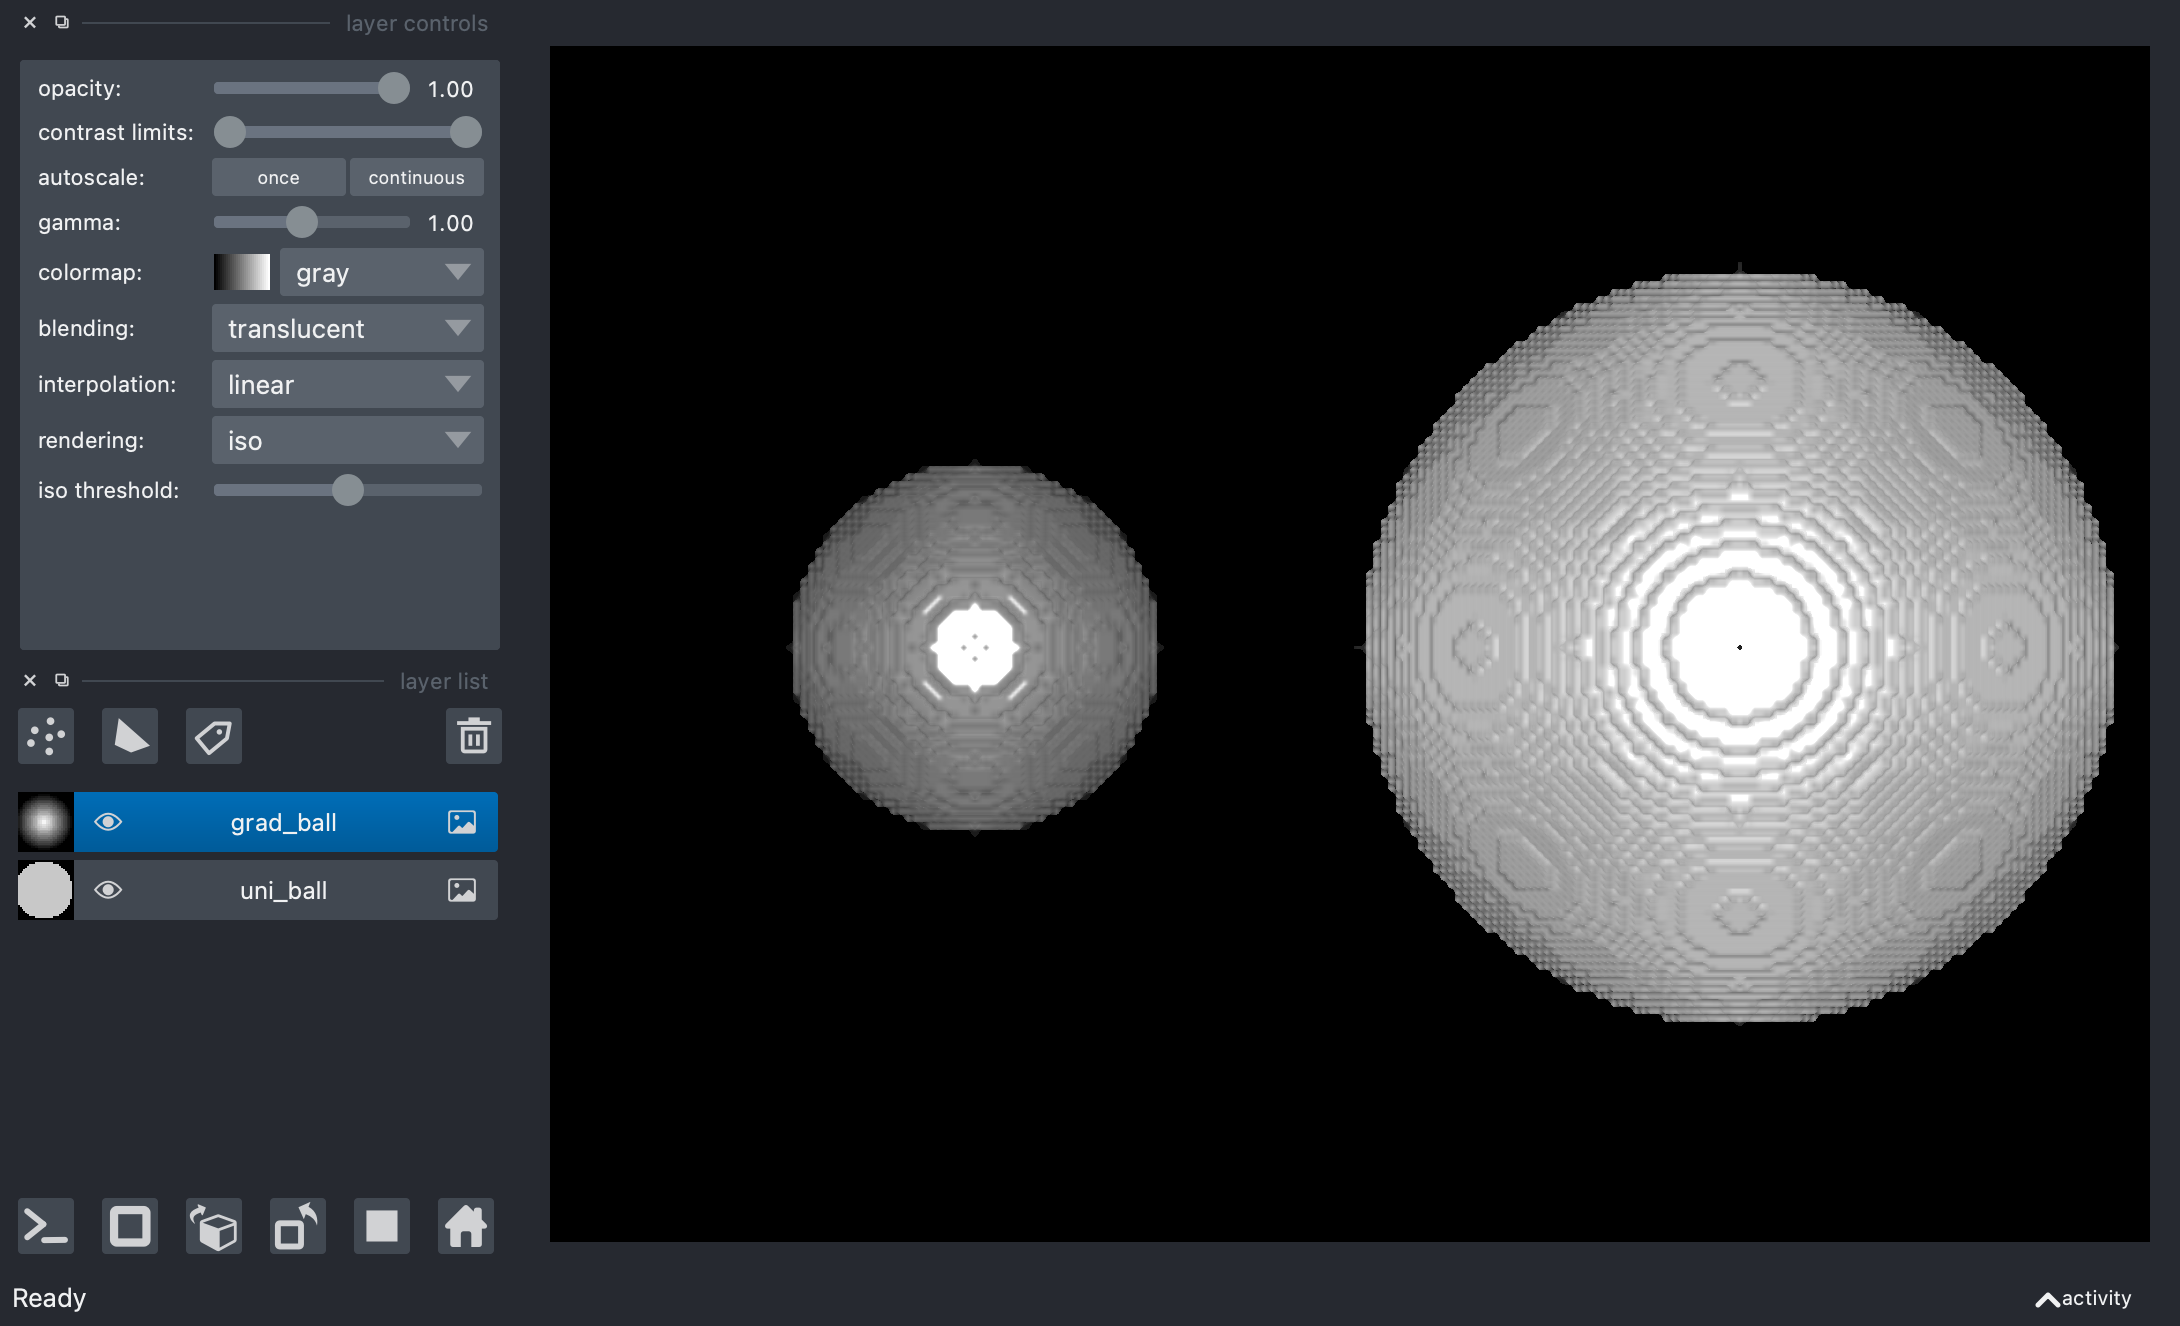

In [85]:
uni.rendering = 'iso'
grad.rendering = 'iso'
nbscreenshot(viewer)

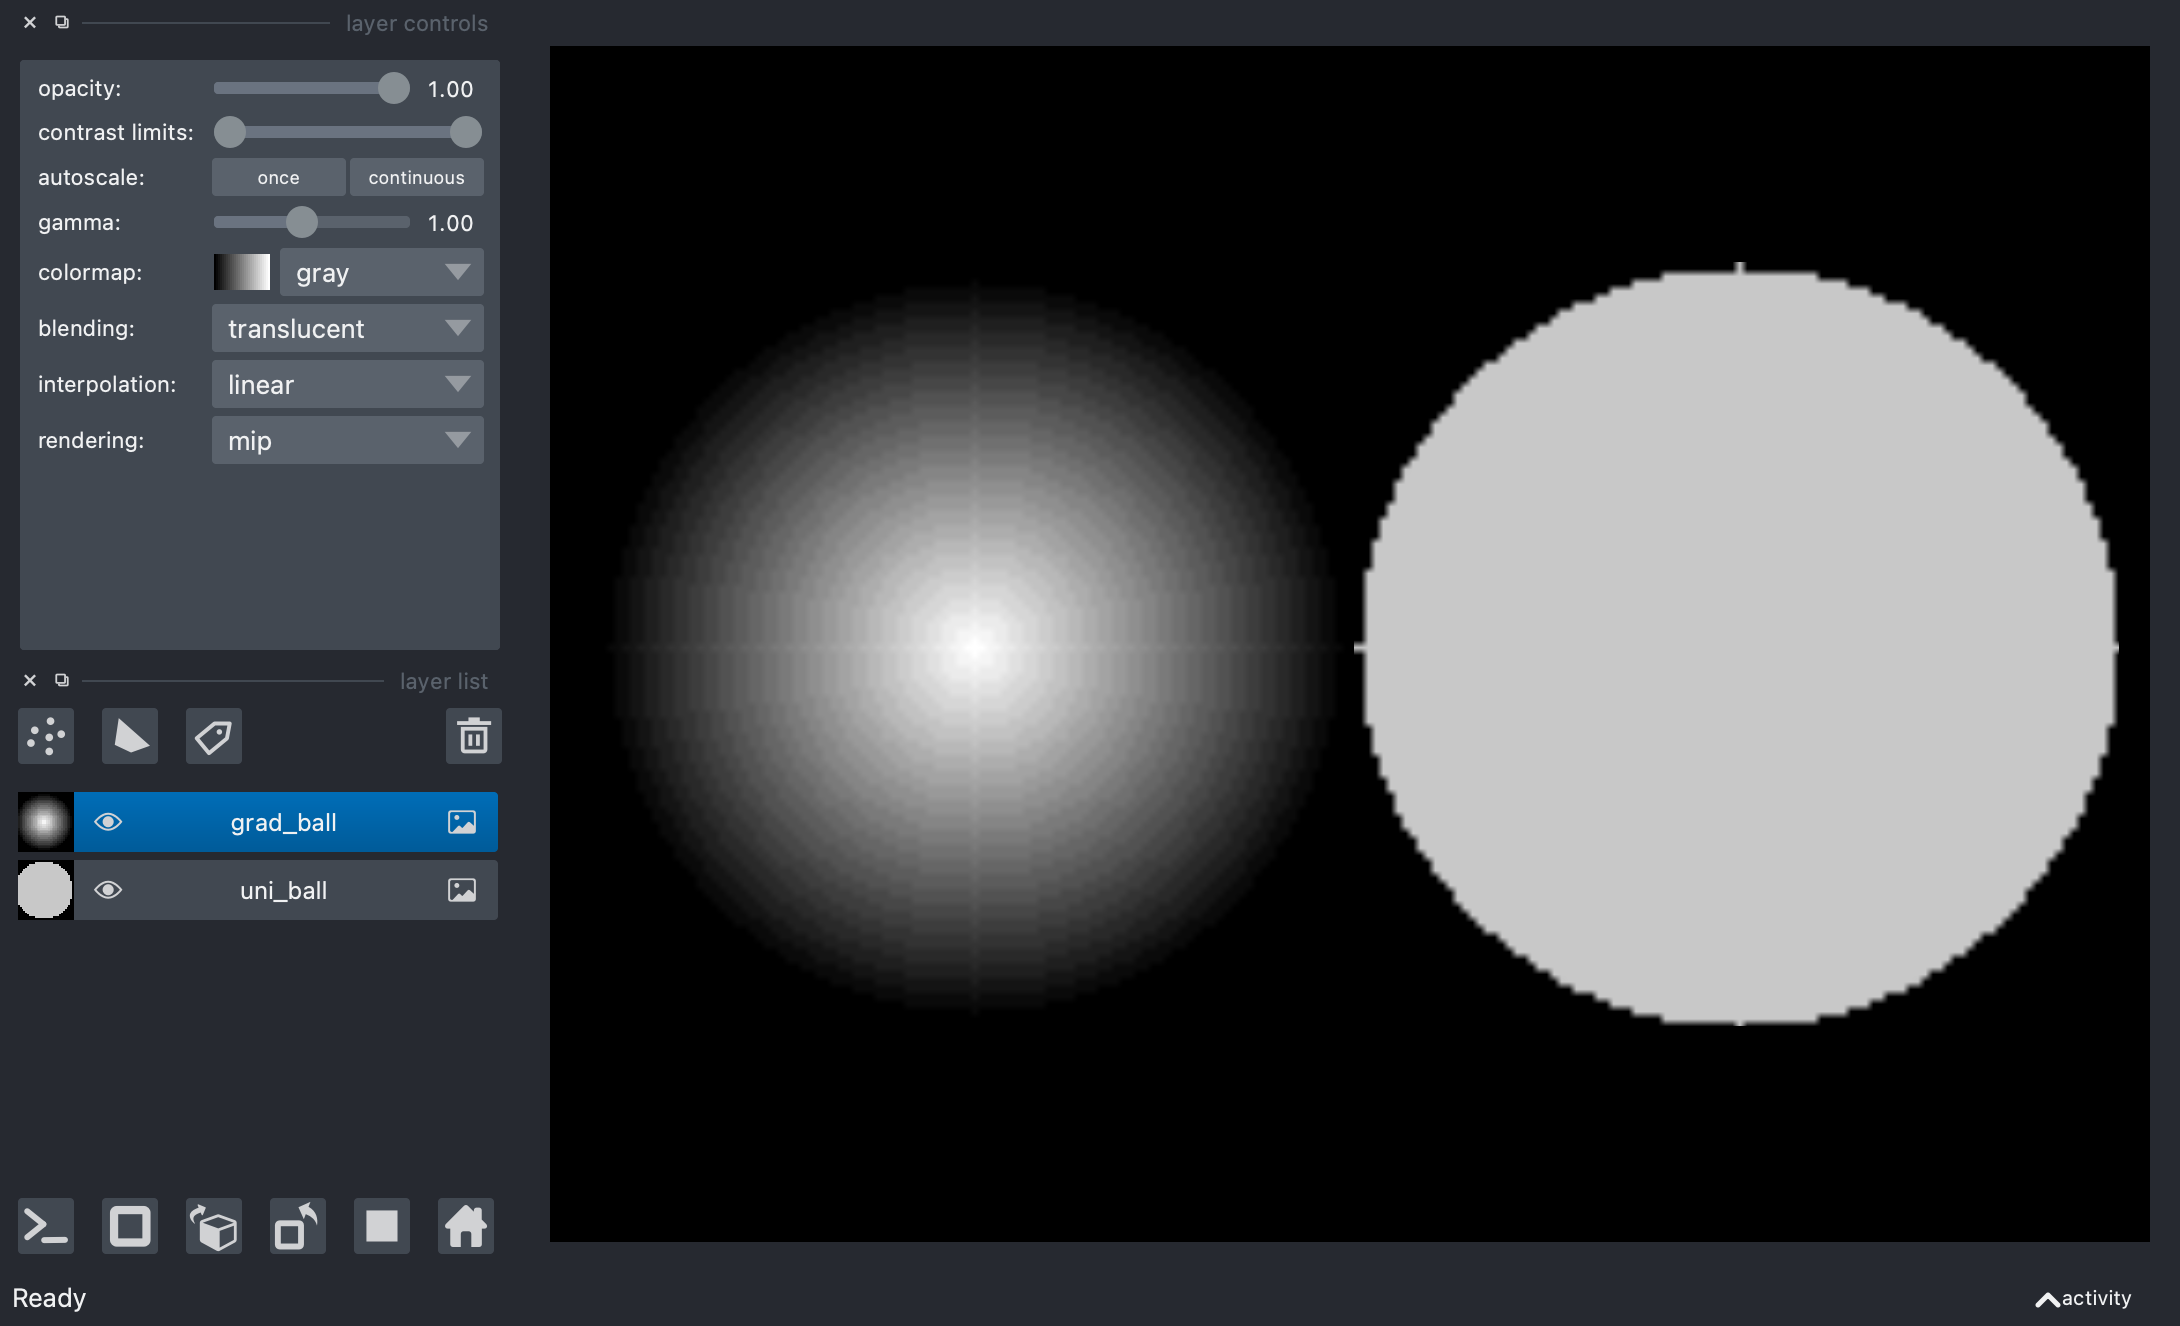

In [86]:
uni.rendering = 'mip'
grad.rendering = 'mip'
nbscreenshot(viewer)

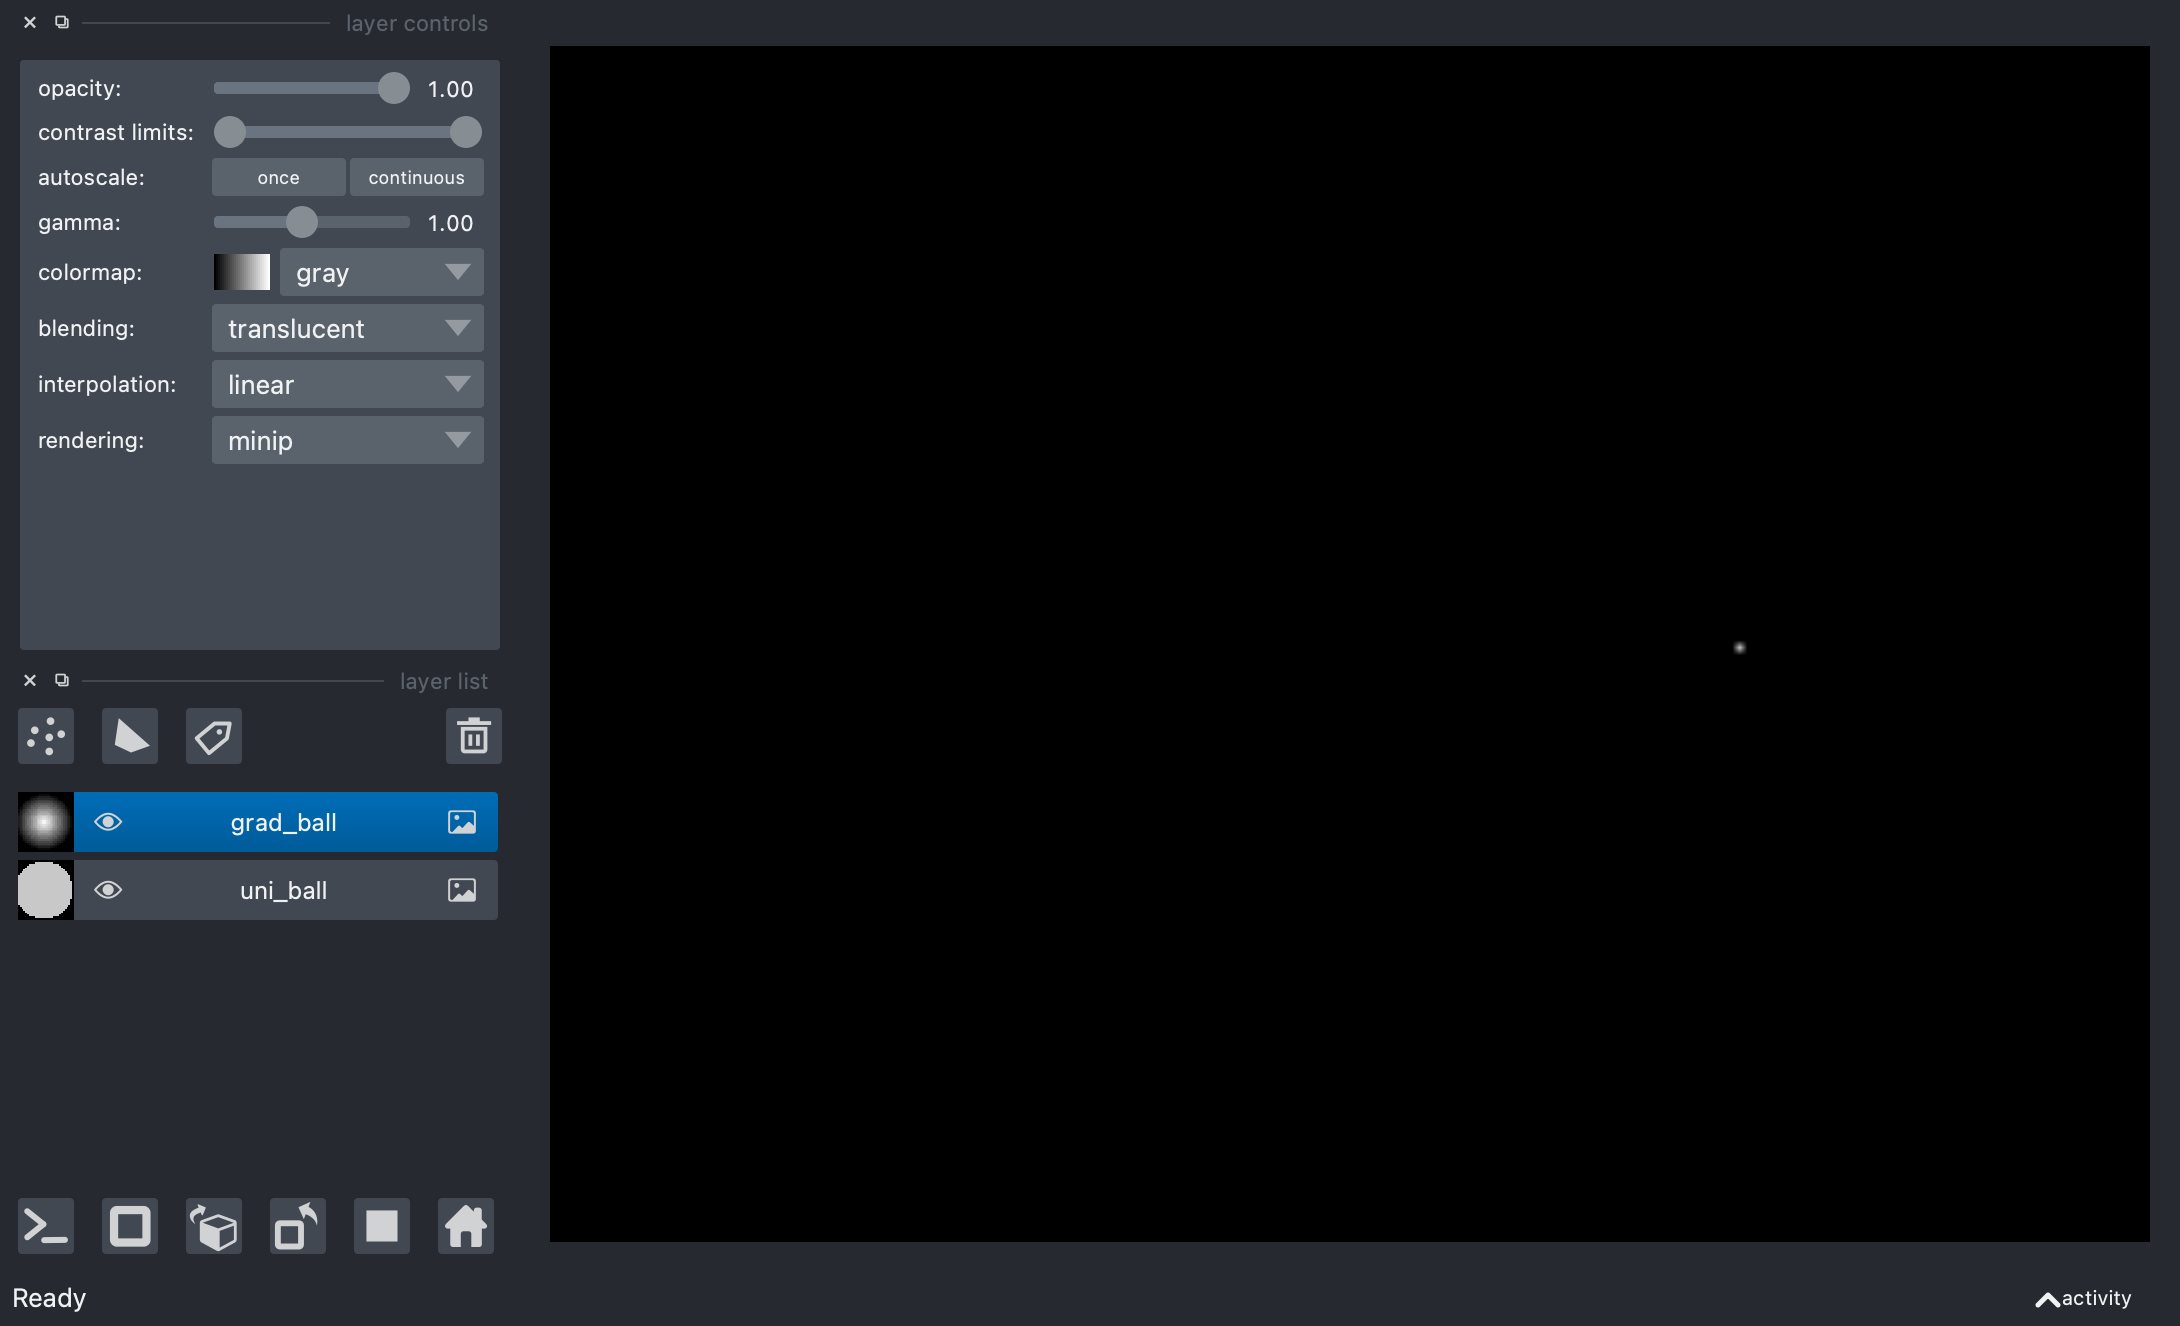

In [87]:
uni.rendering = 'minip'
grad.rendering = 'minip'
nbscreenshot(viewer)

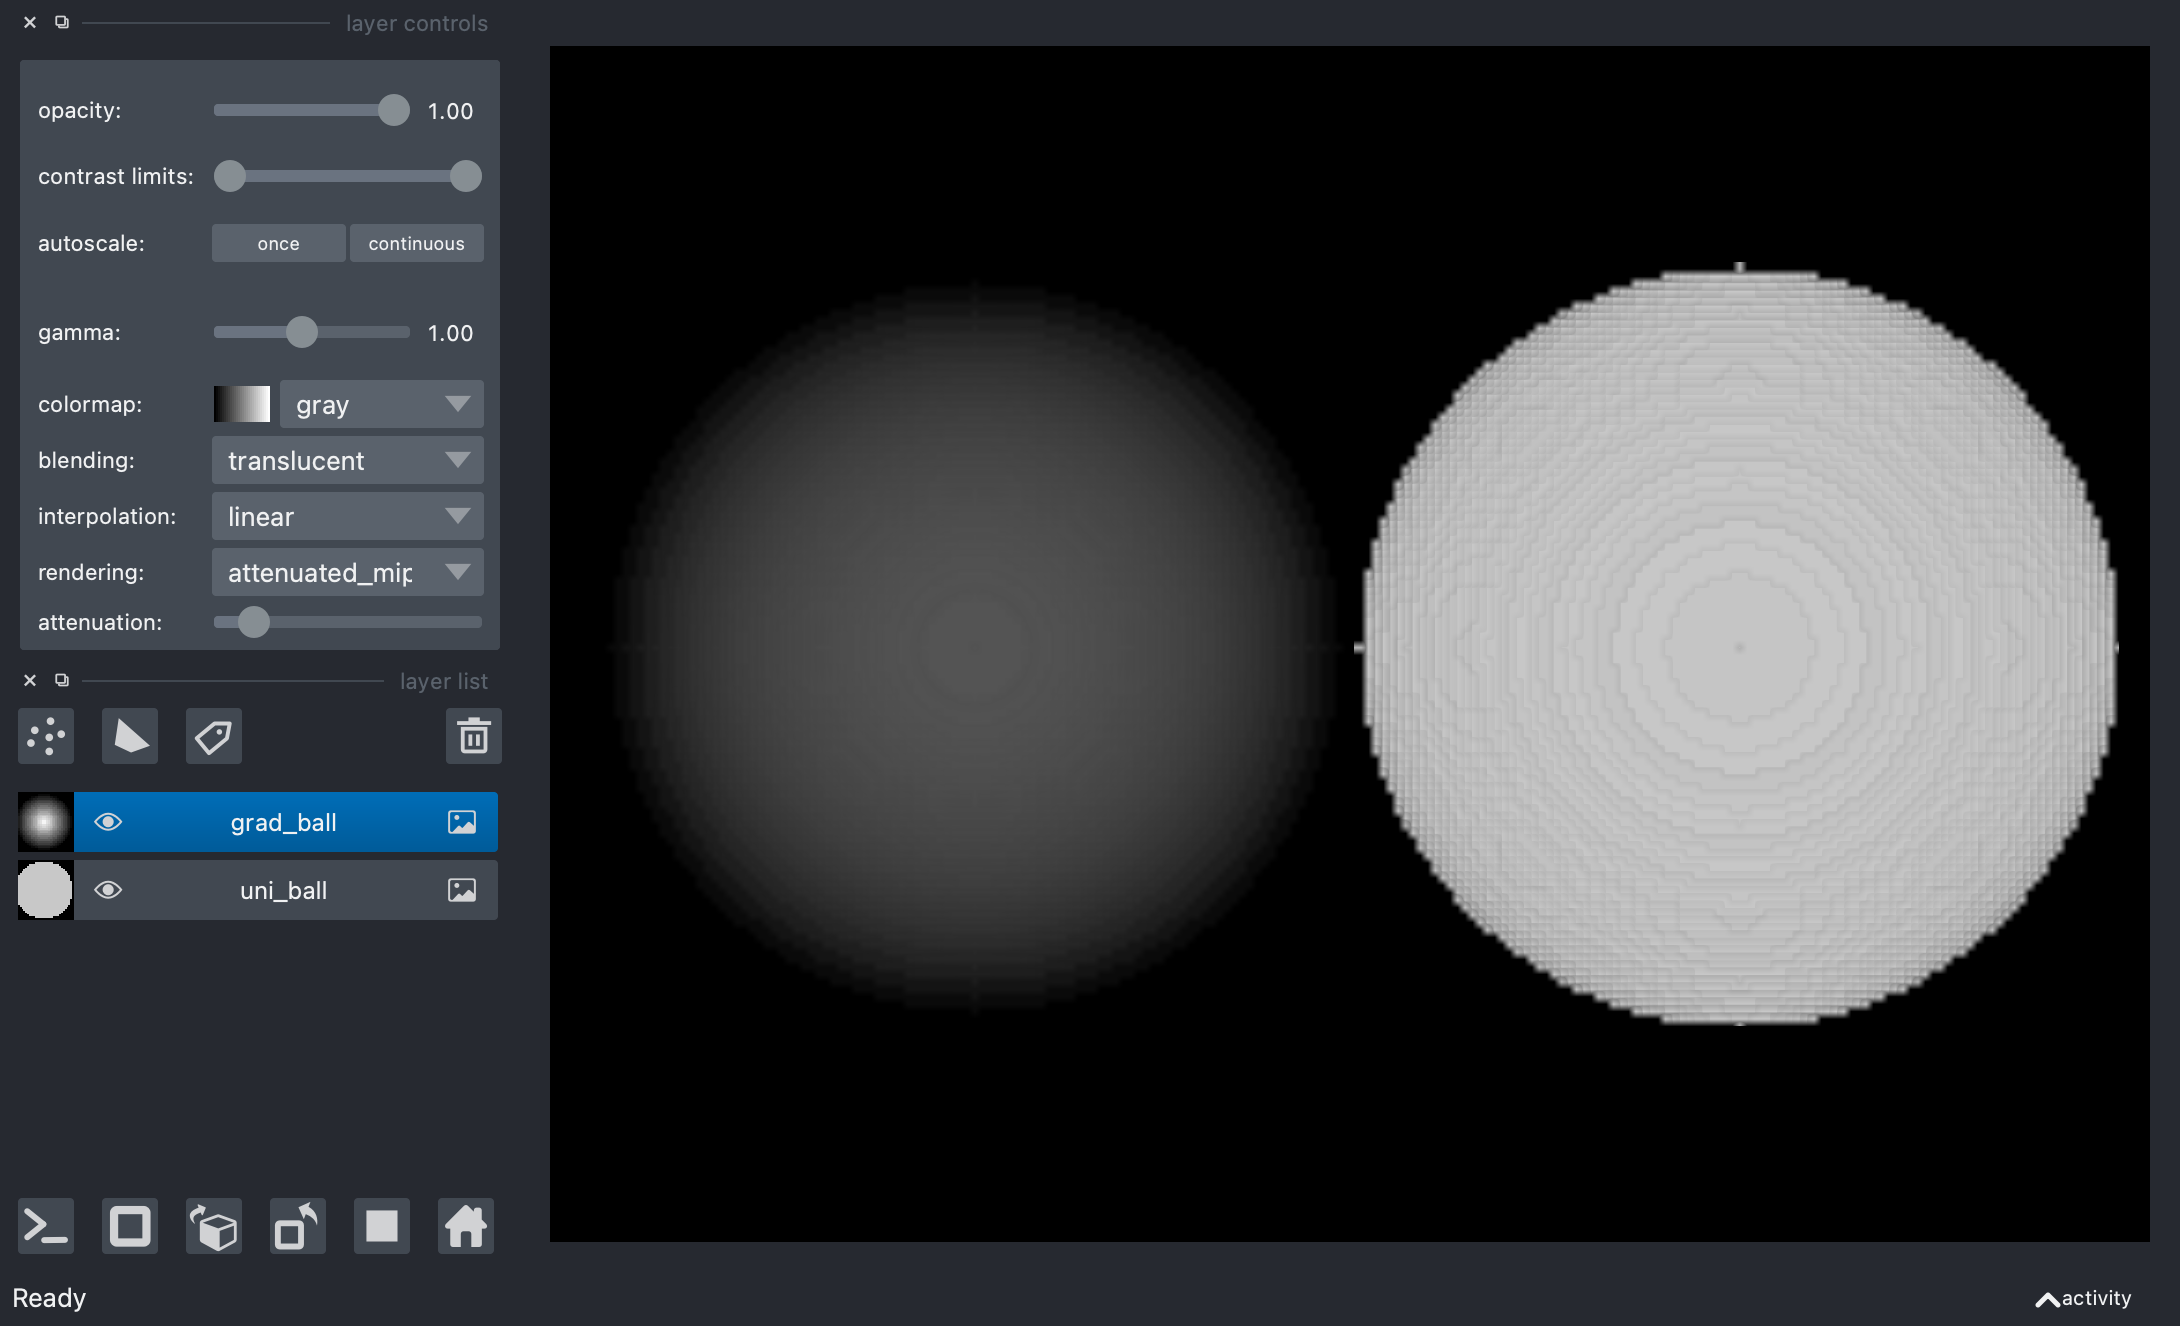

In [88]:
uni.rendering = 'attenuated_mip'
grad.rendering = 'attenuated_mip'
nbscreenshot(viewer)
# default setting for grad_ball not good, why?
# what's a good test image to compare mip and attenuated_mip?

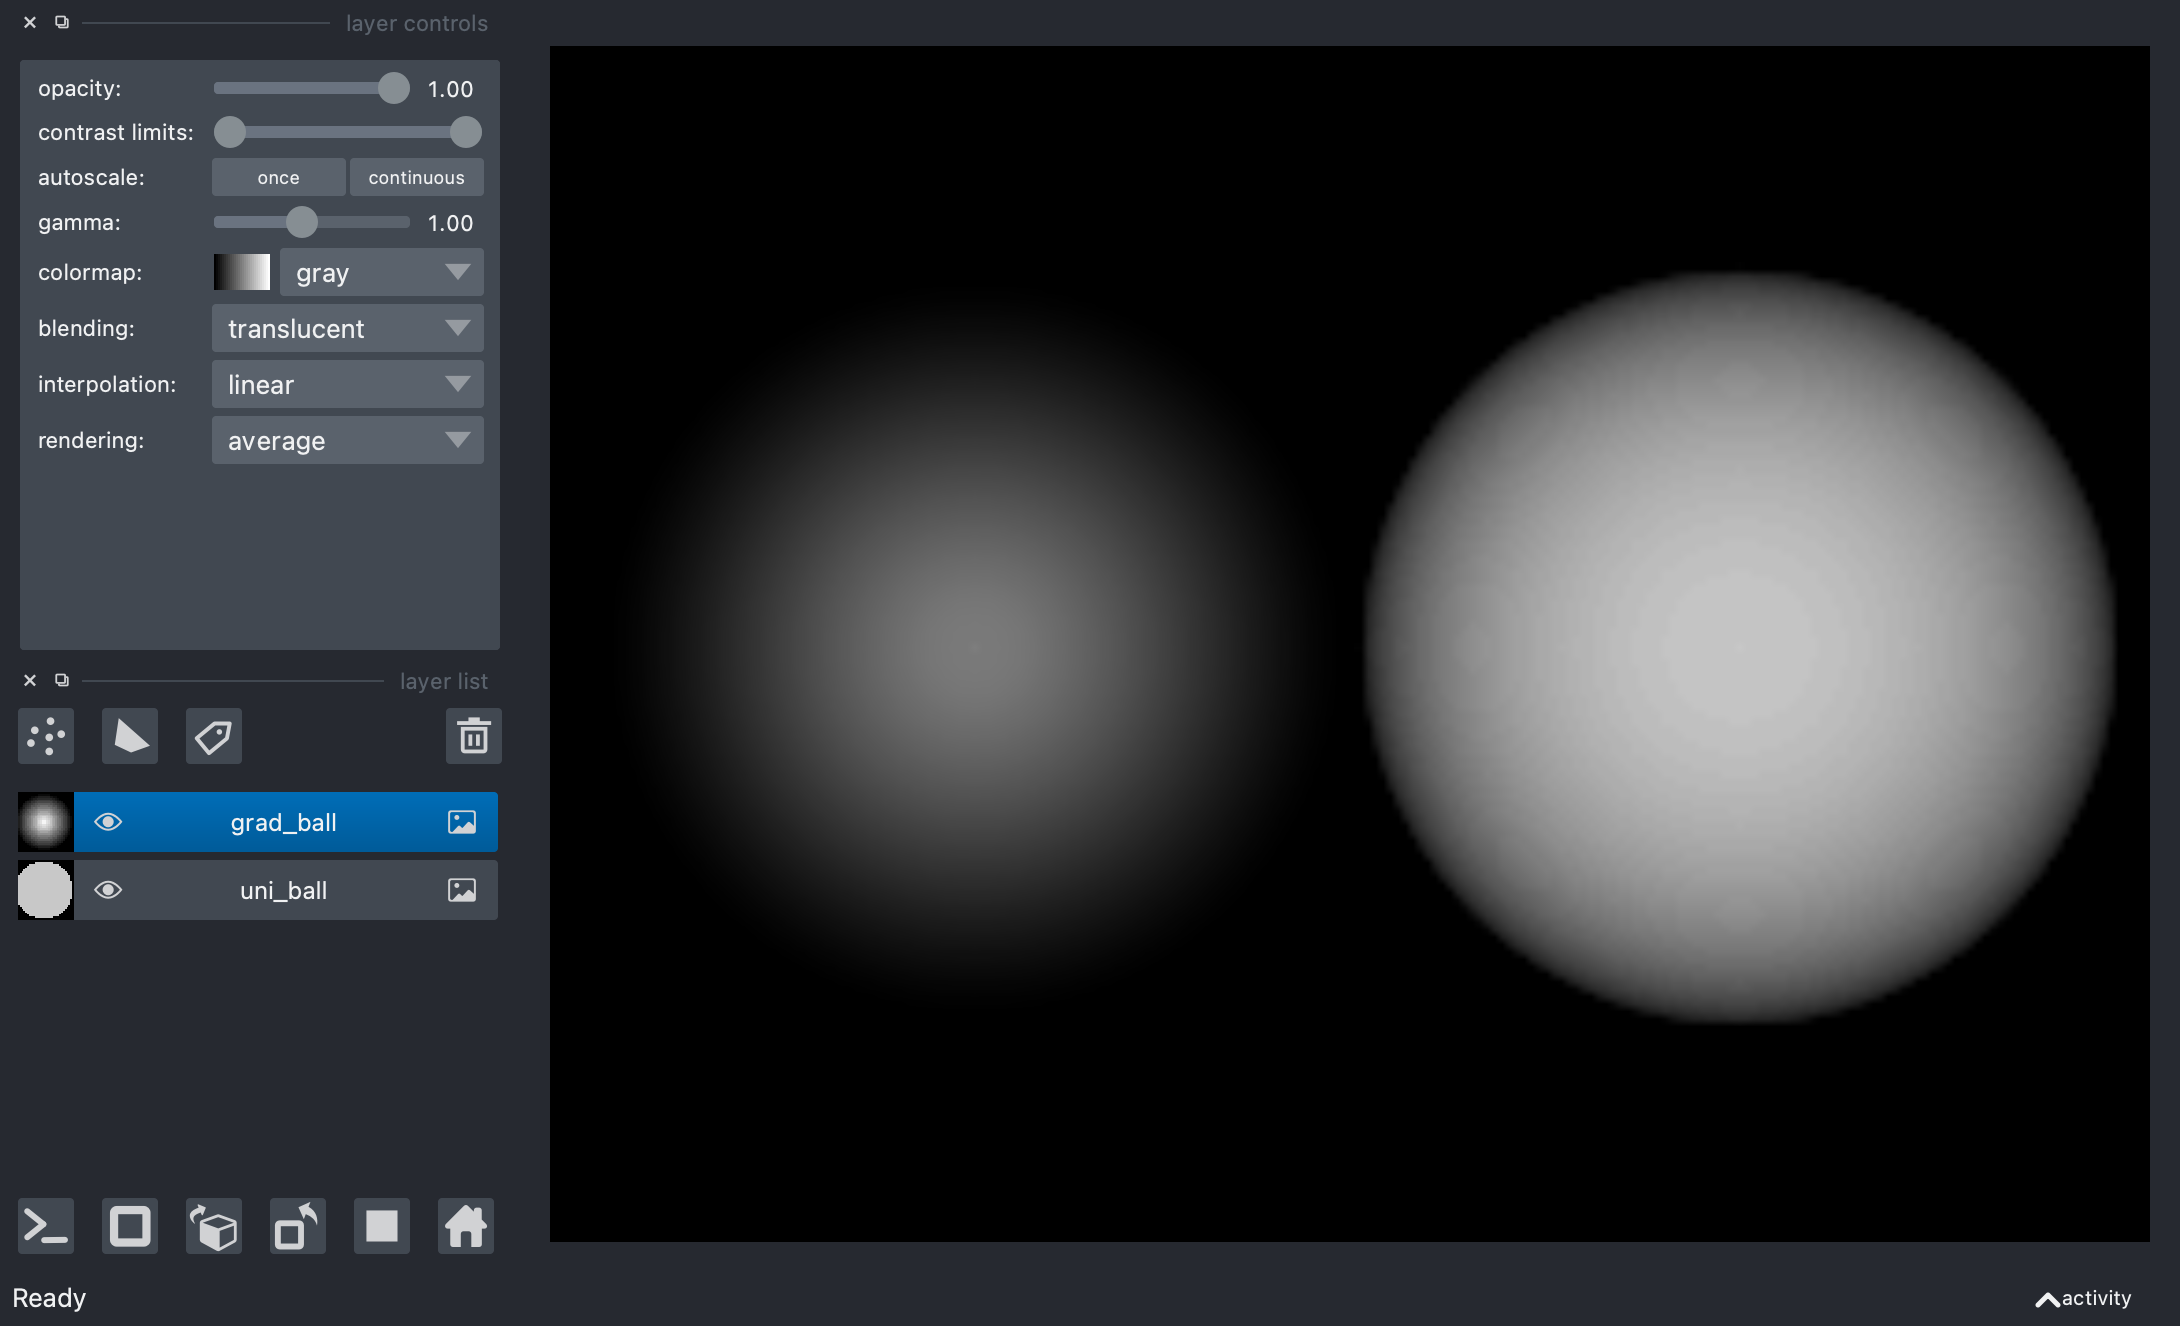

In [89]:
uni.rendering = 'average'
grad.rendering = 'average'
nbscreenshot(viewer)
# Rendering with average could be hard to interpret. 
# The "lower intensity" can be due to an object of same thickness but different intensity,
# or, in the case of uni_ball same intenstiy but different thickness. 

## Blending
Determines how RGB and alpha values get mixed.
affects multi-channel (multi-layer).

Caution: When layers are set with different blending modes, the layer on the top takes the precedence.

### translucent
Allows for multiple layers to be blended with different opacity.

### additive
Allows for multiple layers to be blended together with different colors and opacity.

### opaque
Allows for only the top layer to be visible. 

* API reference: https://napari.org/api/stable/napari.layers.Image.html?highlight=blending#napari.layers.Image.blending
 

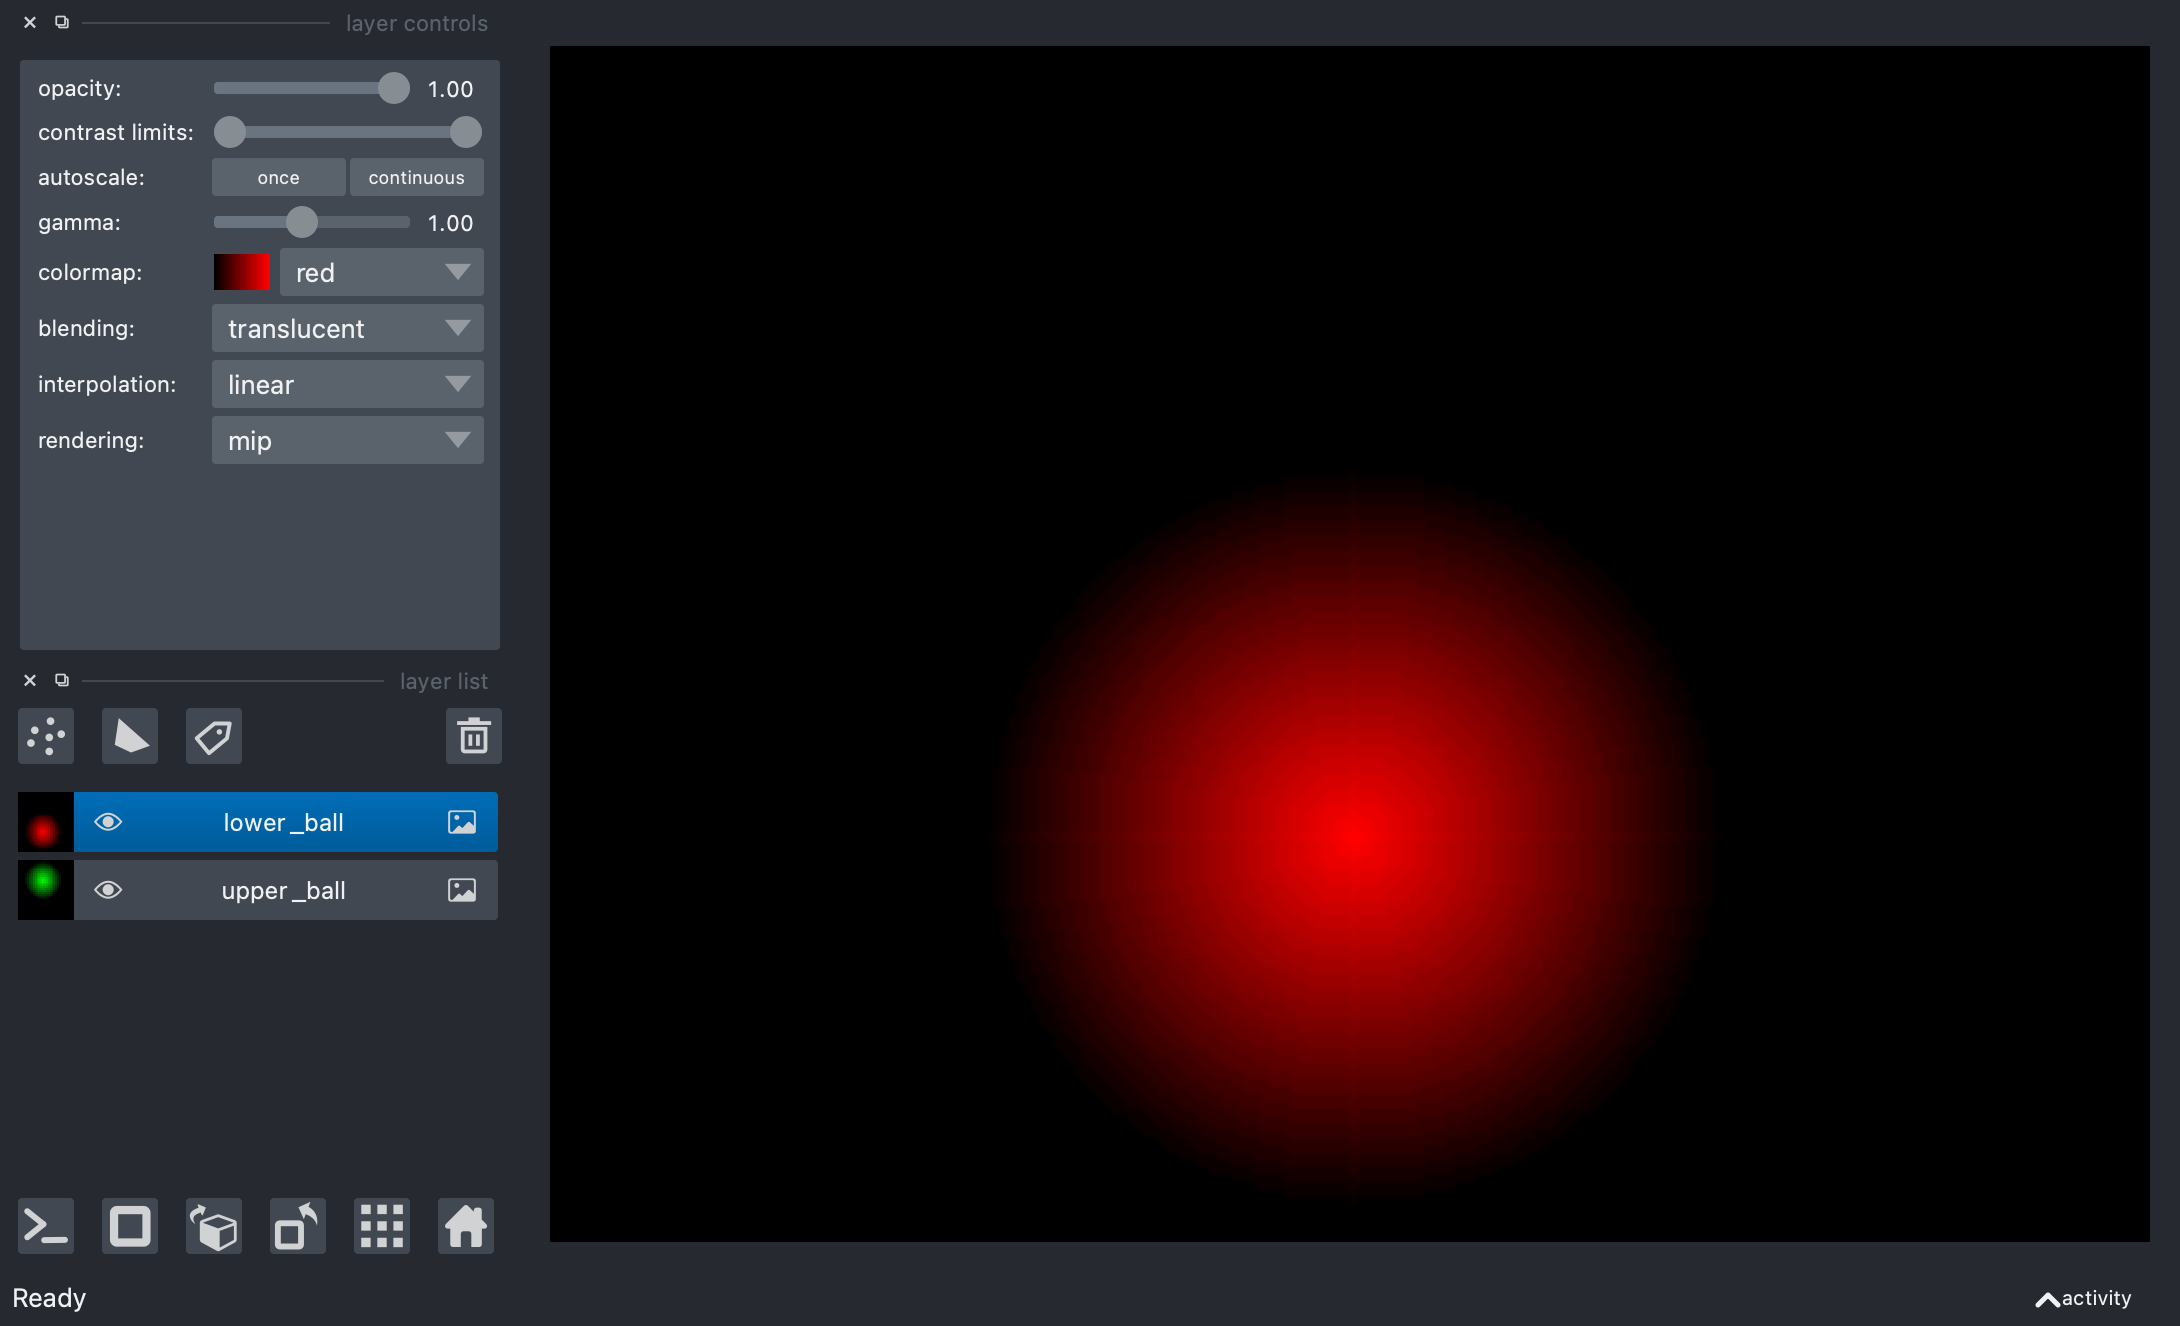

In [90]:
viewer = napari.Viewer(ndisplay=3)
viewer.grid.enabled = False
uball = viewer.add_image(u_ball, name='upper_ball', colormap='green',rendering='mip',interpolation='nearest')
lball = viewer.add_image(l_ball, name='lower_ball', colormap='red',rendering='mip',interpolation='nearest')

uball.blending = 'translucent'
lball.blending = 'translucent'
nbscreenshot(viewer)
# upper_ball doesn't show up because alpha = 1?

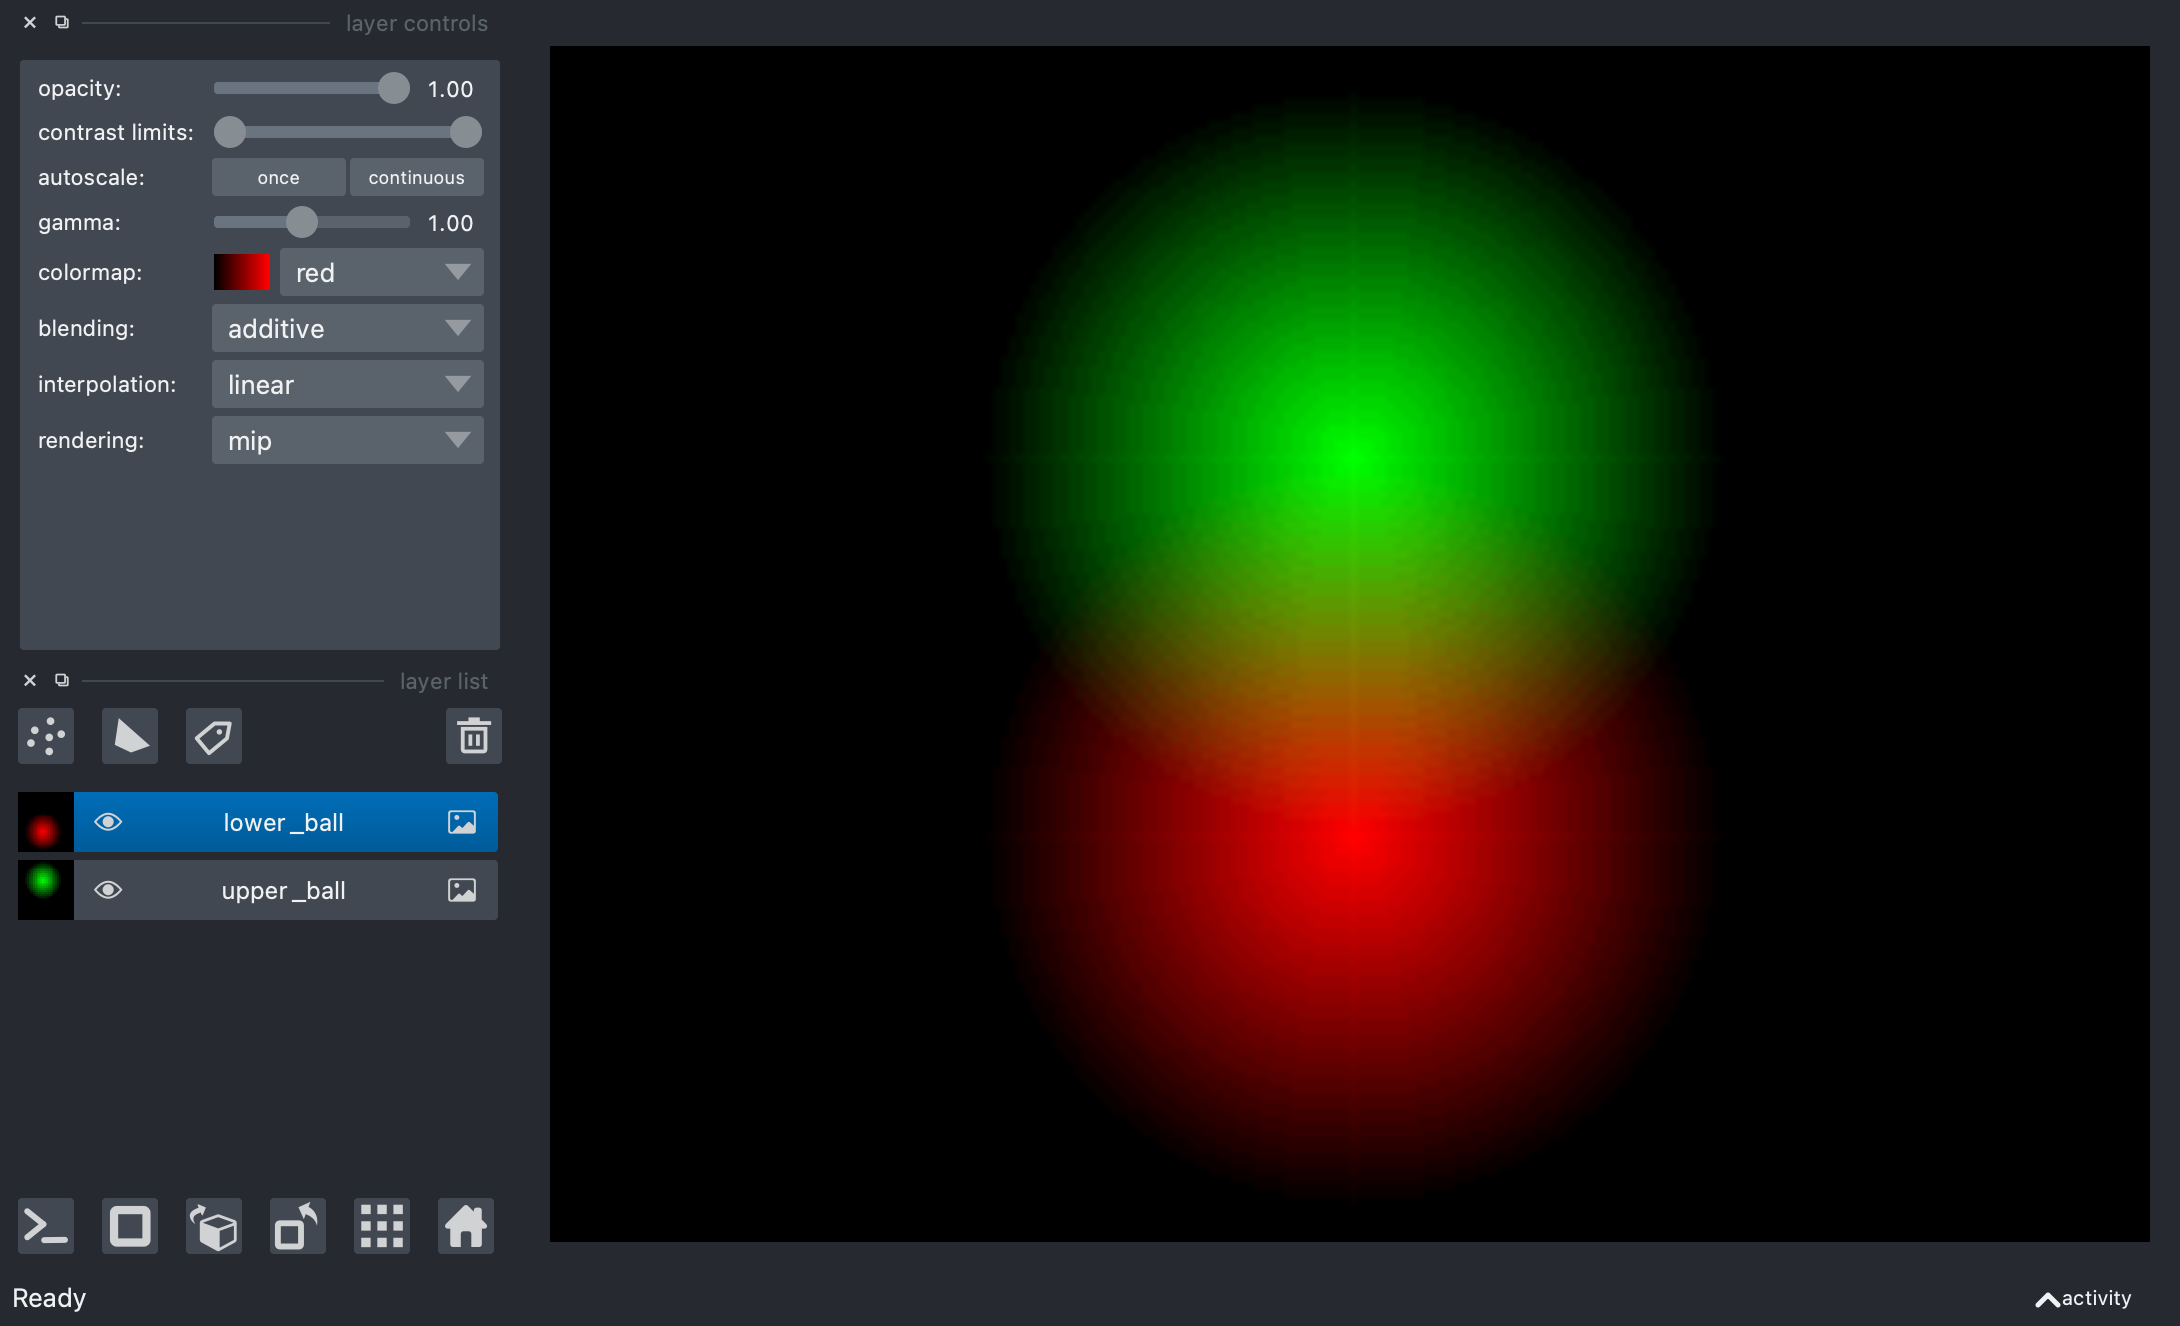

In [91]:
uball.blending = 'additive'
lball.blending = 'additive'
nbscreenshot(viewer)

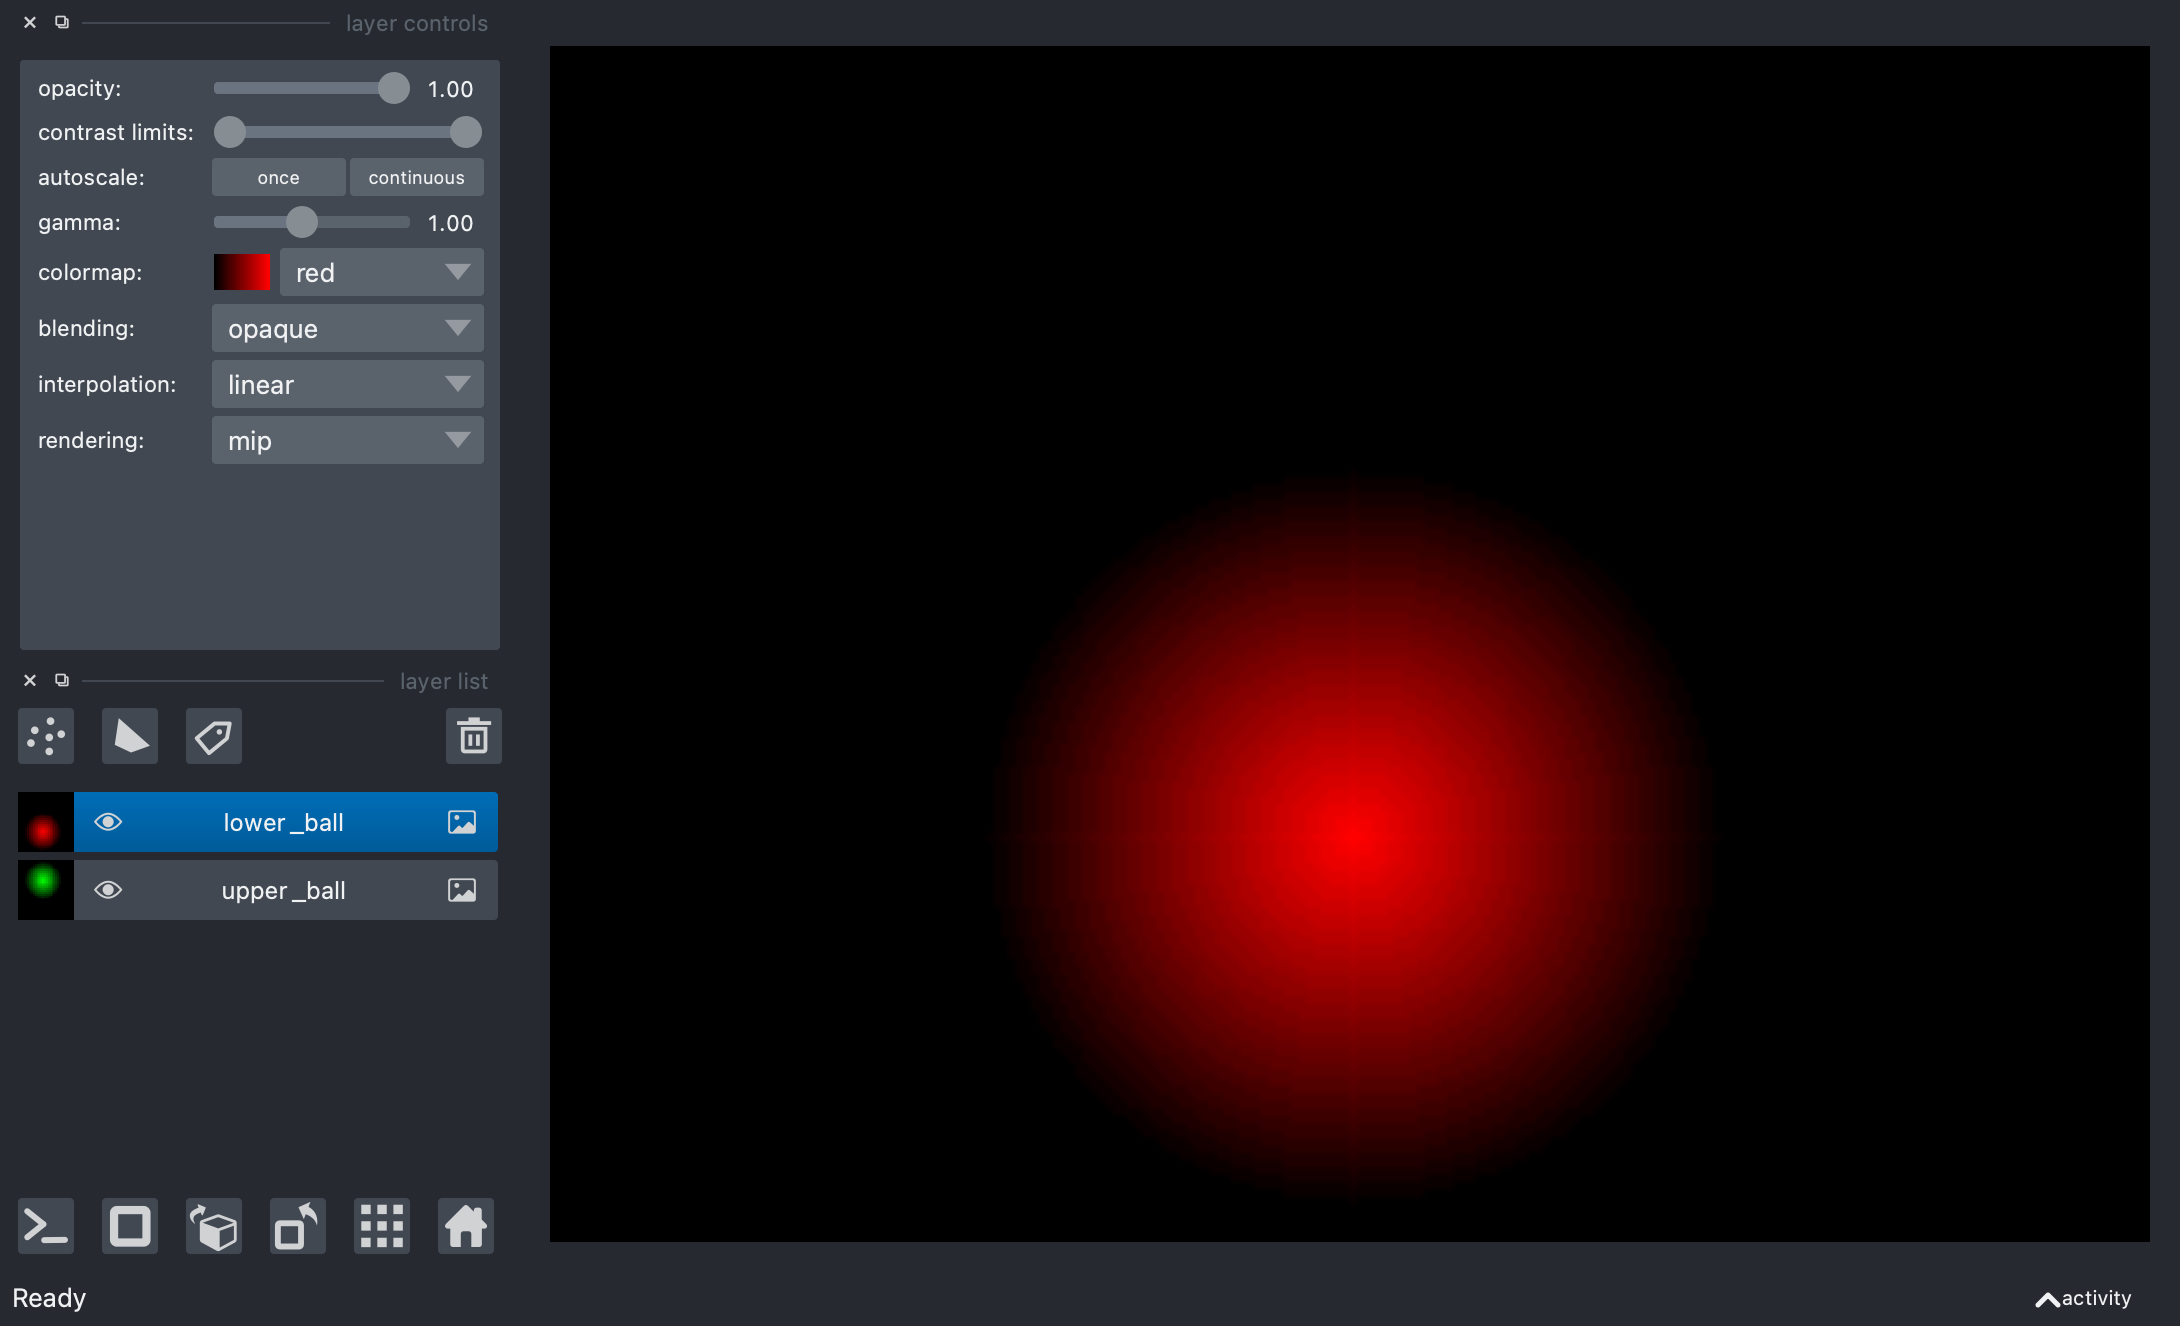

In [92]:
uball.blending = 'opaque'
lball.blending = 'opaque'
nbscreenshot(viewer)

In [93]:
#to do: add alpha value to show translucent rendering/blending